# Librerías

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import pickle

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('datasets/data_for_ml.csv')
df.sample(3)

,Dog breed,lifetime_cost,intellingence_ranking,longevity,weight_kg,shoulder_height_cm,obey_first_command_%_of_time,Renta media/pers (€),Áreas caninas (m²),n_genetic_diseases,tricks_yes,size_category_enc,intelligence_category_enc,house_type_enc,owners_physical_activity_enc
1500,Giant Schnauzer,25488.430312,74.008631,10.134445,36.868651,64.689731,50,20500.0,3852.0,0,1.0,1.0,3.0,1.0,3.0
331,Lhasa Apso,22803.995957,15.262734,13.269049,6.966010,28.361053,85,16890.0,614.0,1,1.0,0.0,2.0,1.0,0.0
819,Irish Setter,20056.434155,58.640600,11.625382,29.723556,67.138502,30,16890.0,614.0,2,0.0,2.0,3.0,0.0,2.0


# Variables para cada cosa a analizar:



## Tamaño (shoulder_height_cm)


In [4]:
X_tam = df[['Renta media/pers (€)', 'Áreas caninas (m²)', 'tricks_yes','house_type_enc','owners_physical_activity_enc']]
y_tam = df['shoulder_height_cm']

## longevity

In [5]:
X_lon = df[['size_category_enc', 'Renta media/pers (€)', 'Áreas caninas (m²)','house_type_enc','owners_physical_activity_enc']]
y_lon = df['longevity']

## intelligence

In [6]:
X_int = df[['Renta media/pers (€)','size_category_enc', 'longevity', 'Áreas caninas (m²)', 'tricks_yes','house_type_enc','owners_physical_activity_enc']]
y_int = df['intellingence_ranking']

# ML Linear Regression en el orden de tamaño, longevidad e inteligencia

## Regresión linear

### Tamaño - Linear

In [7]:
minmax = MinMaxScaler()
X_train_tam, X_test_tam, y_train_tam, y_test_tam = train_test_split(X_tam, y_tam, test_size=0.2, random_state=1)
minmax.fit(X_train_tam)
X_train_tam_scaled = minmax.transform(X_train_tam)
X_test_tam_scaled = minmax.transform(X_test_tam)
lr_1_tam = LinearRegression()
lr_1_tam.fit(X_train_tam_scaled, y_train_tam)

LinearRegression()

In [8]:
y_pred_tam1 = lr_1_tam.predict(X_test_tam_scaled)
mean_squared_error(y_test_tam, y_pred_tam1)

192.93194755505084

In [9]:
# Get the coefficients and intercept
coefficients = lr_1_tam.coef_
intercept = lr_1_tam.intercept_

# # Print the equation
# equation = f"y = {intercept} + {coefficients[0]}x_1 + {coefficients[1]}x_2 +{coefficients[2]}x_3 + {coefficients[3]}x_4 "
# print(equation)
print('Tamaño:')

feature_names = X_tam.columns
for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")

# Print the intercept
print(f"Intercept: {intercept}")

Tamaño:
Renta media/pers (€): -8.06817828364225
Áreas caninas (m²): 36.618823472597924
tricks_yes: -2.6944205020242946
house_type_enc: 12.179173034589496
owners_physical_activity_enc: 9.645898009113512
Intercept: 32.92394833918722


Todas las variables aportan su granito de arena, no se borra ninguna.

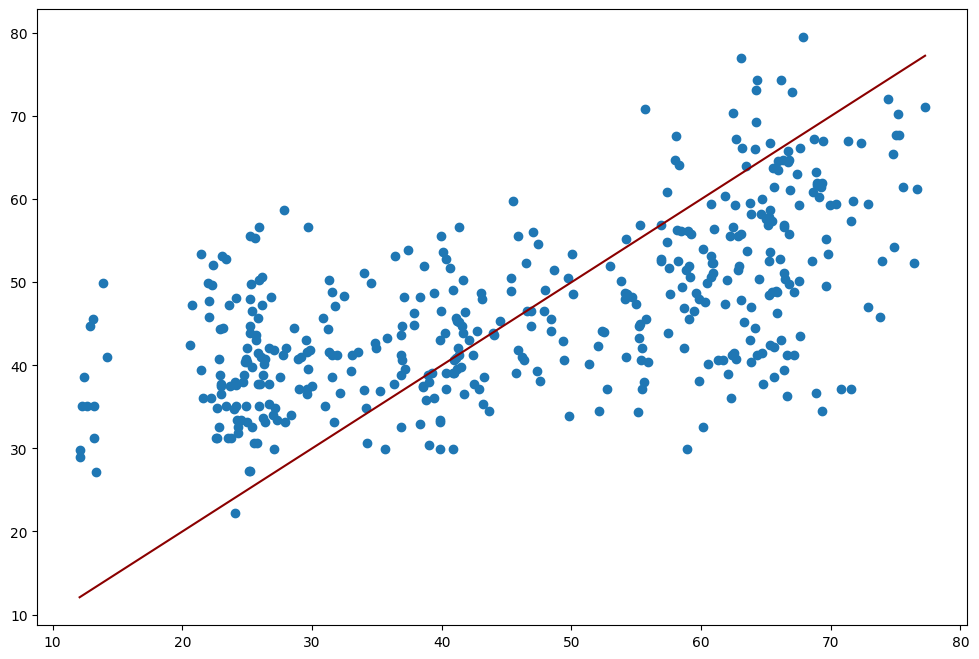

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(x=y_test_tam, y=y_pred_tam1, color='tab:blue')
plt.plot([min(y_test_tam),max(y_test_tam)],[min(y_test_tam),max(y_test_tam)], color='darkred')

### Longevidad

In [11]:
minmax = MinMaxScaler()
X_train_lon, X_test_lon, y_train_lon, y_test_lon = train_test_split(X_lon, y_lon, test_size=0.2, random_state=1)
minmax.fit(X_train_lon)
X_train_lon_scaled = minmax.transform(X_train_lon)
X_test_lon_scaled = minmax.transform(X_test_lon)
lr_1_lon = LinearRegression()
lr_1_lon.fit(X_train_lon_scaled, y_train_lon)

LinearRegression()

In [12]:
y_pred_lon1 = lr_1_lon.predict(X_test_lon)
mean_squared_error(y_test_lon, y_pred_lon1)

3587298378.2476754

In [13]:
# Get the coefficients and intercept
coefficients = lr_1_lon.coef_
intercept = lr_1_lon.intercept_

# # Print the equation
# equation = f"y = {intercept} + {coefficients[0]}x_1 + {coefficients[1]}x_2 +{coefficients[2]}x_3 + {coefficients[3]}x_4 "
# print(equation)
print('longevidad:')

feature_names = X_lon.columns
for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")

# Print the intercept
print(f"Intercept: {intercept}")

longevidad:
size_category_enc: -1.9085729686898933
Renta media/pers (€): 3.3488305233841915
Áreas caninas (m²): -2.7372295960761273
house_type_enc: -0.036217183998836736
owners_physical_activity_enc: 0.04812035296064215
Intercept: 11.36522509271514


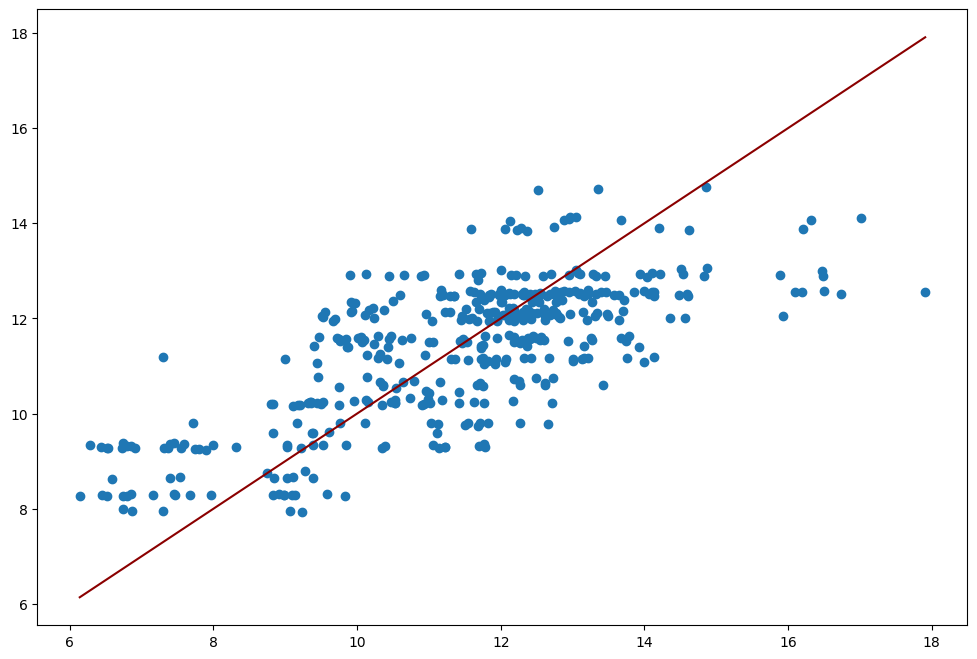

In [14]:
Y_PRED = lr_1_lon.predict(X_test_lon_scaled)
plt.figure(figsize=(12,8))
plt.scatter(x=y_test_lon, y=Y_PRED, color='tab:blue')
plt.plot([min(y_test_lon),max(y_test_lon)],[min(y_test_lon),max(y_test_lon)], color='darkred')

### Inteligencia

In [15]:
minmax = MinMaxScaler()
X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(X_int, y_int, test_size=0.2, random_state=1)
minmax.fit(X_train_int)
X_train_int_scaled = minmax.transform(X_train_int)
X_test_int_scaled = minmax.transform(X_test_int)
lr_1_int = LinearRegression()
lr_1_int.fit(X_train_int_scaled, y_train_int)

LinearRegression()

In [16]:
y_pred_int1 = lr_1_int.predict(X_test_int)
mean_squared_error(y_test_int, y_pred_int1)

86867505992.94229

In [17]:
# Get the coefficients and intercept
coefficients = lr_1_int.coef_
intercept = lr_1_int.intercept_

# # Print the equation
# equation = f"y = {intercept} + {coefficients[0]}x_1 + {coefficients[1]}x_2 +{coefficients[2]}x_3 + {coefficients[3]}x_4 "
# print(equation)
print('inteligencia:')

feature_names = X_int.columns
for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")

# Print the intercept
print(f"Intercept: {intercept}")

inteligencia:
Renta media/pers (€): 16.35873065568984
size_category_enc: 2.9467058618437
longevity: 11.449028160805723
Áreas caninas (m²): -12.104469596513518
tricks_yes: -27.101302373468716
house_type_enc: -0.1190981378069676
owners_physical_activity_enc: -2.1324993138319472
Intercept: 50.86067659443747


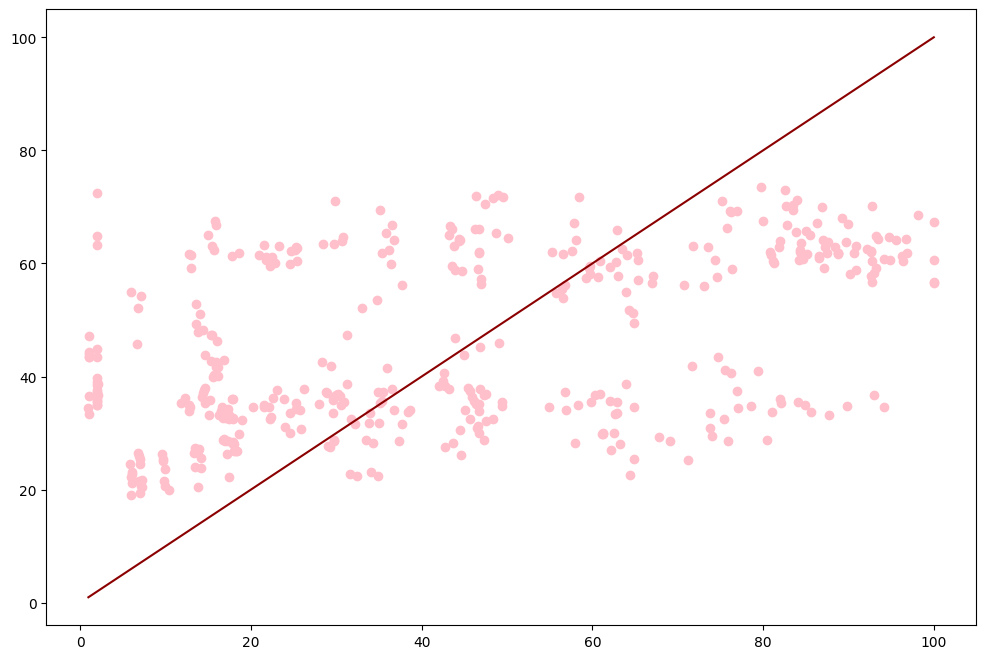

In [18]:
Y_PRED = lr_1_int.predict(X_test_int_scaled)
plt.figure(figsize=(12,8))
plt.scatter(x=y_test_int, y=Y_PRED, color='pink')
plt.plot([min(y_test_int),max(y_test_int)],[min(y_test_int),max(y_test_int)], color='darkred')

## Regesiones polinómicas




### Tamaño - Polinomios

In [19]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_tam, X_test_tam, y_train_tam, y_test_tam = train_test_split(X_tam, y_tam, test_size=0.2, random_state=1)

# Escalar los datos
minmax = MinMaxScaler()
minmax.fit(X_train_tam)
X_train_tam_scaled = minmax.transform(X_train_tam)
X_test_tam_scaled = minmax.transform(X_test_tam)

# Generar características polinómicas de grado 2
poly2 = PolynomialFeatures(2, include_bias=False)
X_train_poly2 = poly2.fit_transform(X_train_tam_scaled)
X_test_poly2 = poly2.transform(X_test_tam_scaled)

# Generar características polinómicas de grado 3
poly3 = PolynomialFeatures(3)
X_train_poly3 = poly3.fit_transform(X_train_tam_scaled)
X_test_poly3 = poly3.transform(X_test_tam_scaled)

# Ajustar un modelo de regresión lineal con características polinómicas
lr_poly2 = LinearRegression()
lr_poly2.fit(X_train_poly2, y_train_tam)
lr_poly3 = LinearRegression()
lr_poly3.fit(X_train_poly3, y_train_tam)

# Hacer predicciones en el conjunto de prueba
y_pred_poly2 = lr_poly2.predict(X_test_poly2)
y_pred_poly3 = lr_poly3.predict(X_test_poly3)


# Calcular el error cuadrático medio
mse_poly2 = mean_squared_error(y_test_tam, y_pred_poly2)
print(f"Mean Squared Error (Polynomial Regression) for pol 2: {mse_poly2}")
mse_poly3 = mean_squared_error(y_test_tam, y_pred_poly3)
print(f"Mean Squared Error (Polynomial Regression) for pol 3: {mse_poly3}")

# Obtener los coeficientes y el intercepto
coefficients_poly2 = lr_poly2.coef_
intercept_poly2 = lr_poly2.intercept_
coefficients_poly3 = lr_poly3.coef_
intercept_poly3 = lr_poly3.intercept_

# Imprimir la ecuación
equation_poly2 = "y(d=2) = {:.2f}".format(intercept_poly2)
for i, coef in enumerate(coefficients_poly2[1:], start=1):
    equation_poly2 += " + {:.2f}x_{}".format(coef, i)

equation_poly3 = "y(d=3) = {:.2f}".format(intercept_poly3)
for i, coef in enumerate(coefficients_poly3[1:], start=1):
    equation_poly3 += " + {:.2f}x_{}".format(coef, i)

print("Ecuación de la regresión polinómicas:")
print(equation_poly2, '\n', equation_poly3)


Mean Squared Error (Polynomial Regression) for pol 2: 169.68042472179093
Mean Squared Error (Polynomial Regression) for pol 3: 164.21077847109308
Ecuación de la regresión polinómicas:
y(d=2) = 29.82 + 53.01x_1 + -112849202745962.38x_2 + 24.86x_3 + 21.38x_4 + 19.42x_5 + -49.64x_6 + -4.92x_7 + 6.06x_8 + 5.84x_9 + 15.27x_10 + 6.59x_11 + -11.40x_12 + -4.87x_13 + 112849202745962.09x_14 + -1.28x_15 + -1.45x_16 + -16.22x_17 + 4.81x_18 + -15.79x_19 
 y(d=3) = 18.98 + 52.16x_1 + 46.90x_2 + -156255648197875.53x_3 + 24.69x_4 + 26.82x_5 + -83.52x_6 + -128.98x_7 + -147035438376.92x_8 + -9.28x_9 + -29.47x_10 + 93.17x_11 + 978853123572.48x_12 + -7.67x_13 + -19.45x_14 + 77493791294598.64x_15 + -688111542048.97x_16 + -732013622802.01x_17 + -7.12x_18 + 15.45x_19 + -13.14x_20 + 54.98x_21 + -12.62x_22 + 2.66x_23 + 16.49x_24 + 20.05x_25 + 135.63x_26 + -10.80x_27 + -9.14x_28 + 43.95x_29 + 147035438361.61x_30 + 23.92x_31 + -1.02x_32 + -16.57x_33 + 10.55x_34 + 2.83x_35 + -73.50x_36 + -29.39x_37 + -33.34x_38 +

Text(0.5, 1.0, 'Regresión Lineal')

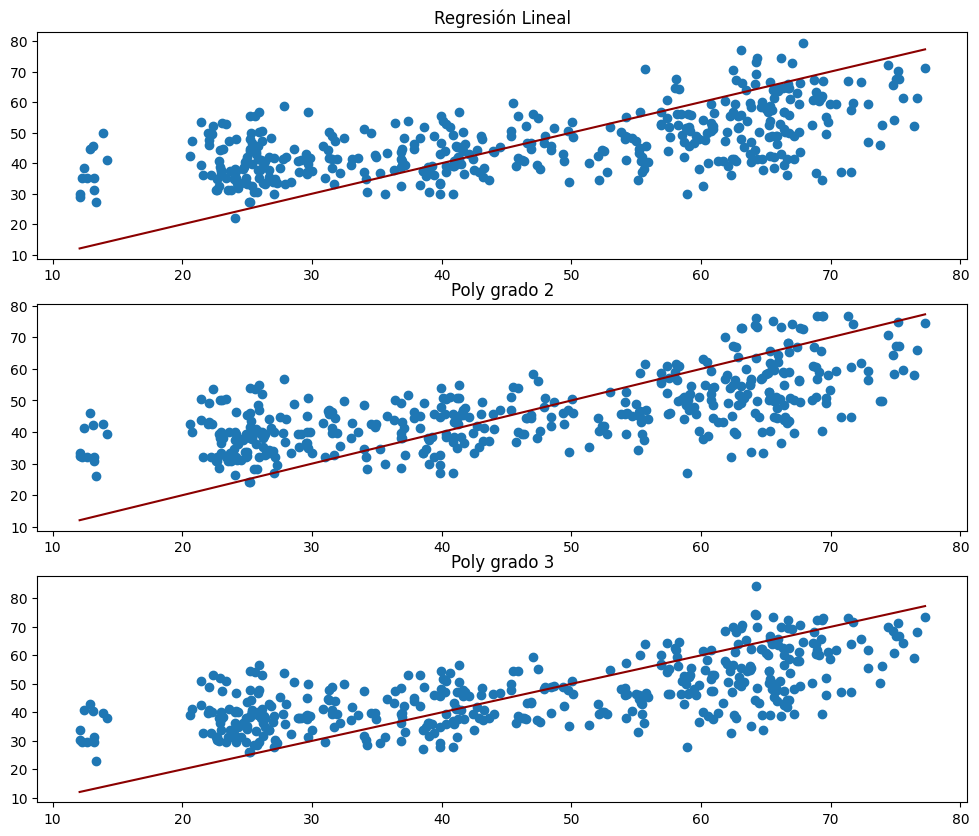

In [20]:
y_pred_d2 = lr_poly2.predict(X_test_poly2)
y_pred_d3 = lr_poly3.predict(X_test_poly3)
# y_test_tam
Y_PRED_tam = lr_1_tam.predict(X_test_tam_scaled)
# plt.scatter(x=y_test_tam1, y=Y_PRED, color='tab:blue')
# plt.plot([30,80],[30,80], color='darkred')

fig, axs = plt.subplots(3,1, figsize=(12,10))
axs[1].scatter(y_test_tam, y_pred_d2, label='Poly grado 2', color='tab:blue')
axs[1].plot([min(y_test_tam),max(y_test_tam)], [min(y_test_tam),max(y_test_tam)], color='darkred')
axs[1].set_title('Poly grado 2')
axs[2].scatter(y_test_tam, y_pred_d3, label='Poly grado 3', color='tab:blue')
axs[2].plot([min(y_test_tam),max(y_test_tam)], [min(y_test_tam),max(y_test_tam)], color='darkred')
axs[2].set_title('Poly grado 3')
axs[0].scatter(y_test_tam, Y_PRED_tam, label='Regresión Lineal', color='tab:blue')
axs[0].plot([min(y_test_tam),max(y_test_tam)], [min(y_test_tam),max(y_test_tam)], color='darkred')
axs[0].set_title('Regresión Lineal')

### Longevidad - Polinomios

In [21]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_lon, X_test_lon, y_train_lon, y_test_lon = train_test_split(X_lon, y_lon, test_size=0.2, random_state=1)

# Escalar los datos
minmax = MinMaxScaler()
minmax.fit(X_train_lon)
X_train_lon_scaled = minmax.transform(X_train_lon)
X_test_lon_scaled = minmax.transform(X_test_lon)

# Generar características polinómicas de grado 2
degree = 2
poly2 = PolynomialFeatures(degree)
X_train_poly2 = poly2.fit_transform(X_train_lon_scaled)
X_test_poly2 = poly2.transform(X_test_lon_scaled)

# Generar características polinómicas de grado 3
degree = 3
poly3 = PolynomialFeatures(degree)
X_train_poly3 = poly3.fit_transform(X_train_lon_scaled)
X_test_poly3 = poly3.transform(X_test_lon_scaled)

# Ajustar un modelo de regresión lineal con características polinómicas
lr_poly2 = LinearRegression()
lr_poly2.fit(X_train_poly2, y_train_lon)
lr_poly3 = LinearRegression()
lr_poly3.fit(X_train_poly3, y_train_lon)

# Hacer predicciones en el conjunto de prueba
y_pred_poly2 = lr_poly2.predict(X_test_poly2)
y_pred_poly3 = lr_poly3.predict(X_test_poly3)


# Calcular el error cuadrático medio
mse_poly2 = mean_squared_error(y_test_lon, y_pred_poly2)
print(f"Mean Squared Error (Polynomial Regression) for pol 2: {mse_poly2}")
mse_poly3 = mean_squared_error(y_test_lon, y_pred_poly3)
print(f"Mean Squared Error (Polynomial Regression) for pol 3: {mse_poly3}")

# Obtener los coeficientes y el intercepto
coefficients_poly2 = lr_poly2.coef_
intercept_poly2 = lr_poly2.intercept_
coefficients_poly3 = lr_poly3.coef_
intercept_poly3 = lr_poly3.intercept_

# Imprimir la ecuación
equation_poly2 = "y(d=2) = {:.2f}".format(intercept_poly2)
for i, coef in enumerate(coefficients_poly2[1:], start=1):
    equation_poly2 += " + {:.2f}x_{}".format(coef, i)

equation_poly3 = "y(d=3) = {:.2f}".format(intercept_poly3)
for i, coef in enumerate(coefficients_poly3[1:], start=1):
    equation_poly3 += " + {:.2f}x_{}".format(coef, i)

print("Ecuación de la regresión polinómicas:")
print(equation_poly2, '\n', equation_poly3)

Mean Squared Error (Polynomial Regression) for pol 2: 1.9043147251577355
Mean Squared Error (Polynomial Regression) for pol 3: 1.8847902610923701
Ecuación de la regresión polinómicas:
y(d=2) = 10.44 + -0.73x_1 + 6.80x_2 + -2.44x_3 + 0.06x_4 + 0.29x_5 + -0.33x_6 + -0.79x_7 + -0.62x_8 + -0.16x_9 + -0.16x_10 + -3.69x_11 + 3.19x_12 + -0.05x_13 + -0.18x_14 + -2.63x_15 + -0.03x_16 + 0.89x_17 + -0.10x_18 + 0.27x_19 + -0.43x_20 
 y(d=3) = 10.85 + -198278956084.32x_1 + 6.84x_2 + -8.53x_3 + 0.18x_4 + 1.08x_5 + 594836868249.03x_6 + 1.43x_7 + -3.96x_8 + -0.50x_9 + 0.46x_10 + -1.13x_11 + -5.74x_12 + -1.52x_13 + -3.73x_14 + 21.10x_15 + -0.99x_16 + 3.50x_17 + 0.67x_18 + 0.55x_19 + -0.97x_20 + -396557912165.58x_21 + -0.51x_22 + -5.25x_23 + -0.27x_24 + 1.03x_25 + -1.67x_26 + -2.27x_27 + 0.30x_28 + 0.45x_29 + 20.53x_30 + -0.85x_31 + -1.78x_32 + 0.98x_33 + -0.36x_34 + -1.38x_35 + -3.27x_36 + 10.19x_37 + 0.65x_38 + 1.52x_39 + 8.20x_40 + 2.65x_41 + -1.95x_42 + 0.19x_43 + 0.22x_44 + 2.16x_45 + -32.84x_46 + 

Text(0.5, 1.0, 'Regresión Lineal')

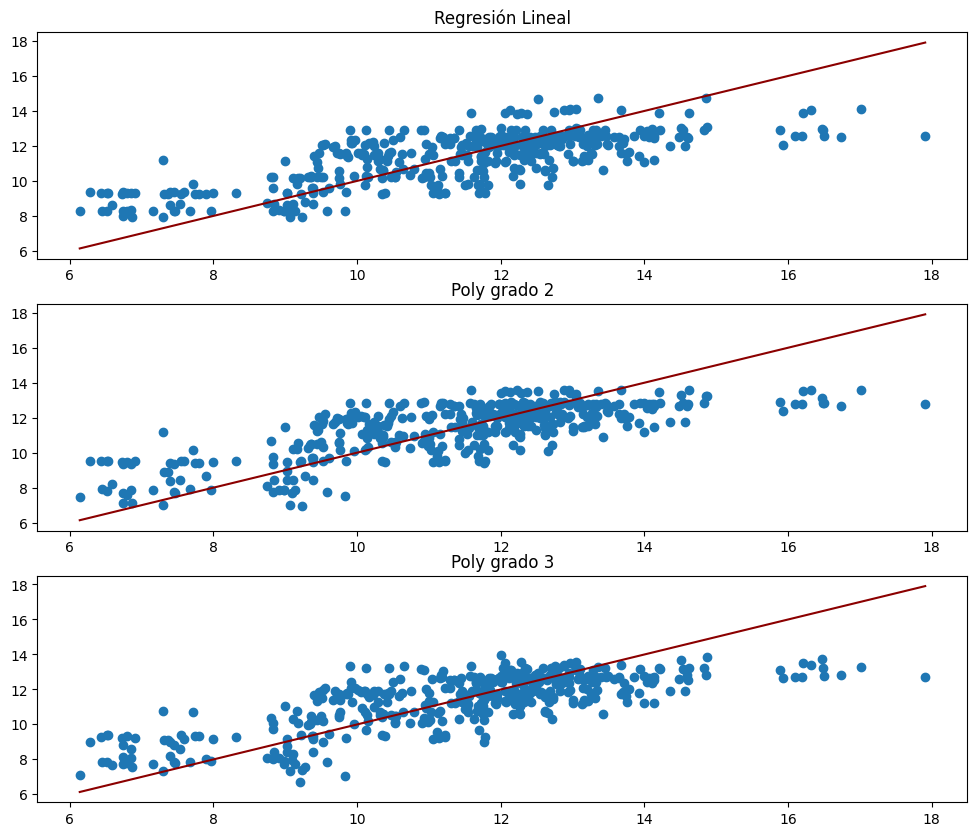

In [22]:
y_pred_d2_lon = lr_poly2.predict(X_test_poly2)
y_pred_d3_lon = lr_poly3.predict(X_test_poly3)
# y_test_lon
Y_PRED_lon = lr_1_lon.predict(X_test_lon_scaled)
# plt.scatter(x=y_test_lon1, y=Y_PRED, color='tab:blue')
# plt.plot([30,80],[30,80], color='darkred')

fig, axs = plt.subplots(3, 1, figsize=(12,10))
axs[1].scatter(y_test_lon, y_pred_d2_lon, label='Poly grado 2', color='tab:blue')
axs[1].plot([min(y_test_lon),max(y_test_lon)], [min(y_test_lon),max(y_test_lon)], color='darkred')
axs[1].set_title('Poly grado 2')
axs[2].scatter(y_test_lon, y_pred_d3_lon, label='Poly grado 3', color='tab:blue')
axs[2].plot([min(y_test_lon),max(y_test_lon)], [min(y_test_lon),max(y_test_lon)], color='darkred')
axs[2].set_title('Poly grado 3')
axs[0].scatter(y_test_lon, Y_PRED_lon, label='Regresión Lineal', color='tab:blue')
axs[0].plot([min(y_test_lon),max(y_test_lon)], [min(y_test_lon),max(y_test_lon)], color='darkred')
axs[0].set_title('Regresión Lineal')

In [23]:
print('Lineal:')
print(f'MAE:  {mean_absolute_error(y_test_lon, Y_PRED_lon):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_lon, Y_PRED_lon)):.2f}')

print('Polinomio grado 2:')
print(f'MAE:  {mean_absolute_error(y_test_lon, y_pred_d2):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_lon, y_pred_d2_lon)):.2f}')

print('Polinomio grado 3:')
print(f'MAE:  {mean_absolute_error(y_test_lon, y_pred_d3):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_lon, y_pred_d3_lon)):.2f}')

Lineal:
MAE:  1.13
RMSE: 1.42
Polinomio grado 2:
MAE:  34.99
RMSE: 1.38
Polinomio grado 3:
MAE:  34.99
RMSE: 1.37


### Inteligencia - Polinomios

In [24]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(X_int, y_int, test_size=0.2, random_state=1)

# Escalar los datos
minmax = MinMaxScaler()
minmax.fit(X_train_int)
X_train_int_scaled = minmax.transform(X_train_int)
X_test_int_scaled = minmax.transform(X_test_int)

# Generar características polinómicas de grado 2
degree = 2
poly2 = PolynomialFeatures(degree)
X_train_poly2 = poly2.fit_transform(X_train_int_scaled)
X_test_poly2 = poly2.transform(X_test_int_scaled)

# Generar características polinómicas de grado 3
degree = 3
poly3 = PolynomialFeatures(degree)
X_train_poly3 = poly3.fit_transform(X_train_int_scaled)
X_test_poly3 = poly3.transform(X_test_int_scaled)

# Ajustar un modelo de regresión lineal con características polinómicas
lr_poly2 = LinearRegression()
lr_poly2.fit(X_train_poly2, y_train_int)
lr_poly3 = LinearRegression()
lr_poly3.fit(X_train_poly3, y_train_int)

# Hacer predicciones en el conjunto de prueba
y_pred_poly2 = lr_poly2.predict(X_test_poly2)
y_pred_poly3 = lr_poly3.predict(X_test_poly3)


# Calcular el error cuadrático medio
mse_poly2 = mean_squared_error(y_test_int, y_pred_poly2)
print(f"Mean Squared Error (Polynomial Regression) for pol 2: {mse_poly2}")
mse_poly3 = mean_squared_error(y_test_int, y_pred_poly3)
print(f"Mean Squared Error (Polynomial Regression) for pol 3: {mse_poly3}")

# Obtener los coeficientes y el intercepto
coefficients_poly2 = lr_poly2.coef_
intercept_poly2 = lr_poly2.intercept_
coefficients_poly3 = lr_poly3.coef_
intercept_poly3 = lr_poly3.intercept_

# Imprimir la ecuación
equation_poly2 = "y(d=2) = {:.2f}".format(intercept_poly2)
for i, coef in enumerate(coefficients_poly2[1:], start=1):
    equation_poly2 += " + {:.2f}x_{}".format(coef, i)

equation_poly3 = "y(d=3) = {:.2f}".format(intercept_poly3)
for i, coef in enumerate(coefficients_poly3[1:], start=1):
    equation_poly3 += " + {:.2f}x_{}".format(coef, i)

print("Ecuación de la regresión polinómicas:")
print(equation_poly2, '\n', equation_poly3)

Mean Squared Error (Polynomial Regression) for pol 2: 562.4156503790289
Mean Squared Error (Polynomial Regression) for pol 3: 537.5349869899751
Ecuación de la regresión polinómicas:
y(d=2) = -12.61 + 37.67x_1 + 58.85x_2 + 218.16x_3 + -18.26x_4 + 451262604847089.75x_5 + -0.85x_6 + -7.15x_7 + 11.60x_8 + -30.72x_9 + -62.91x_10 + 16.70x_11 + -17.09x_12 + 12.49x_13 + 10.47x_14 + -23.09x_15 + -22.16x_16 + -43.55x_17 + -4.63x_18 + 1.16x_19 + 1.84x_20 + -175.97x_21 + 51.70x_22 + -23.49x_23 + -0.26x_24 + -9.26x_25 + 36.34x_26 + 12.44x_27 + -12.83x_28 + -1.86x_29 + -451262604847088.88x_30 + -3.81x_31 + -5.78x_32 + -5.14x_33 + 10.55x_34 + 1.79x_35 
 y(d=3) = -33.36 + -86.58x_1 + 3289962176598.83x_2 + 423.14x_3 + -124.84x_4 + 341539035879331.50x_5 + -10.70x_6 + 2.94x_7 + 40.67x_8 + 14.63x_9 + 242.87x_10 + 221.39x_11 + -3348508189206.68x_12 + 18.08x_13 + -50.81x_14 + -9869886529609.30x_15 + -15.76x_16 + 42.22x_17 + 1189122721529.28x_18 + -31.59x_19 + -41.82x_20 + -547.88x_21 + -0.73x_22 + -21723761

Text(0.5, 1.0, 'Regresión Lineal')

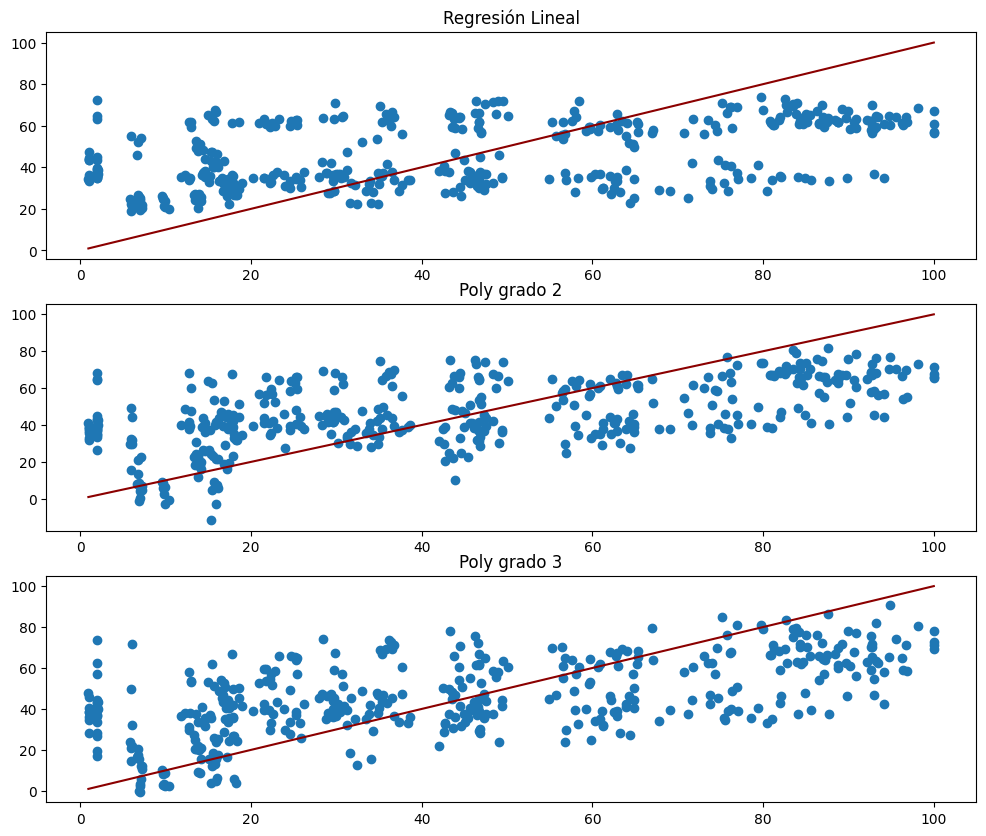

In [25]:
y_pred_d2 = lr_poly2.predict(X_test_poly2)
y_pred_d3 = lr_poly3.predict(X_test_poly3)
# y_test_int
Y_PRED_int = lr_1_int.predict(X_test_int_scaled)
# plt.scatter(x=y_test_int1, y=Y_PRED, color='tab:blue')
# plt.plot([30,80],[30,80], color='darkred')

fig, axs = plt.subplots(3, 1, figsize=(12,10))
axs[1].scatter(y_test_int, y_pred_d2, label='Poly grado 2', color='tab:blue')
axs[1].plot([min(y_test_int),max(y_test_int)], [min(y_test_int),max(y_test_int)], color='darkred')
axs[1].set_title('Poly grado 2')
axs[2].scatter(y_test_int, y_pred_d3, label='Poly grado 3', color='tab:blue')
axs[2].plot([min(y_test_int),max(y_test_int)], [min(y_test_int),max(y_test_int)], color='darkred')
axs[2].set_title('Poly grado 3')
axs[0].scatter(y_test_int, Y_PRED_int, label='Regresión Lineal', color='tab:blue')
axs[0].plot([min(y_test_int),max(y_test_int)], [min(y_test_int),max(y_test_int)], color='darkred')
axs[0].set_title('Regresión Lineal')

# Decission Tree Regressor

## Tamaño

In [26]:
grid_params = {
    'tree__max_depth' : [2,4,6,8,10],
    'tree__min_samples_leaf' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150]
}

pipe = Pipeline([('scaler', MinMaxScaler()), ('tree', DecisionTreeRegressor())])

gs_dt_tam = GridSearchCV(pipe, grid_params, cv=5, verbose=1, scoring='neg_mean_squared_error', return_train_score=True)

In [27]:
gs_dt_tam.fit(X_tam, y_tam)

Fitting 5 folds for each of 55 candidates, totalling 275 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('tree', DecisionTreeRegressor())]),
             param_grid={'tree__max_depth': [2, 4, 6, 8, 10],
                         'tree__min_samples_leaf': [10, 20, 30, 40, 50, 60, 70,
                                                    80, 90, 100, 150]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [28]:
df_res_tam = pd.DataFrame(gs_dt_tam.cv_results_['params'])
df_res_tam['test_result'] = gs_dt_tam.cv_results_['mean_test_score']
df_res_tam ['train_result'] = gs_dt_tam.cv_results_['mean_train_score']
df_res_tam.head(3)

,tree__max_depth,tree__min_samples_leaf,test_result,train_result
0,2,10,-211.710815,-191.680486
1,2,20,-211.710815,-191.680486
2,2,30,-211.710815,-191.680486


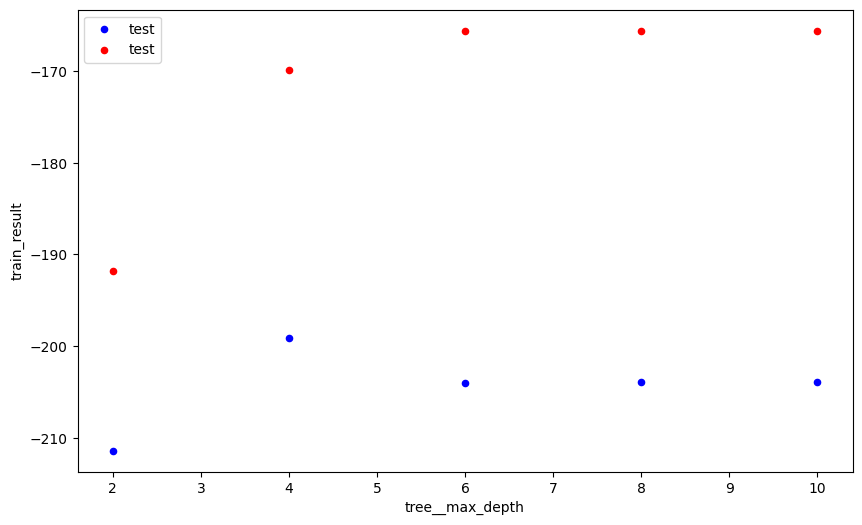

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
df_res_tam[df_res_tam['tree__min_samples_leaf']==90].plot.scatter('tree__max_depth', 'test_result', label='test', ax=ax, color='blue')
df_res_tam[df_res_tam['tree__min_samples_leaf']==90].plot.scatter('tree__max_depth', 'train_result', label='test', ax=ax, color='red')
plt.legend()

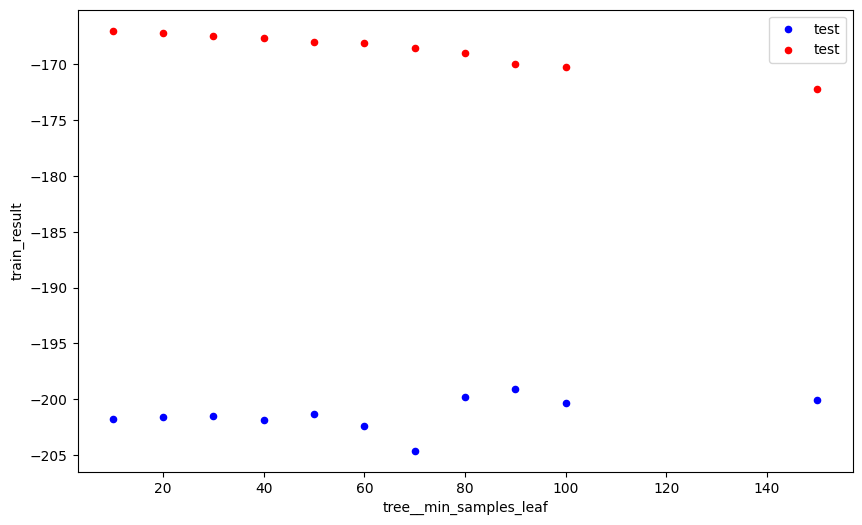

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
df_res_tam[df_res_tam['tree__max_depth']==4].plot.scatter('tree__min_samples_leaf', 'test_result', label='test', ax=ax, color='blue')
df_res_tam[df_res_tam['tree__max_depth']==4].plot.scatter('tree__min_samples_leaf', 'train_result', label='test', ax=ax, color='red')
plt.legend()

max_depth = 4

min_samples_lead = 90

## Longevidad

In [31]:
grid_params = {
    'tree__max_depth' : [2,4,6,8,10],
    'tree__min_samples_leaf' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150]
}

pipe = Pipeline([('scaler', MinMaxScaler()), ('tree', DecisionTreeRegressor())])

gs_dt_lon = GridSearchCV(pipe, grid_params, cv=5, verbose=1, scoring='neg_mean_squared_error', return_train_score=True)

In [32]:
gs_dt_lon.fit(X_lon, y_lon)

Fitting 5 folds for each of 55 candidates, totalling 275 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('tree', DecisionTreeRegressor())]),
             param_grid={'tree__max_depth': [2, 4, 6, 8, 10],
                         'tree__min_samples_leaf': [10, 20, 30, 40, 50, 60, 70,
                                                    80, 90, 100, 150]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [33]:
df_res_lon = pd.DataFrame(gs_dt_lon.cv_results_['params'])
df_res_lon['test_result'] = gs_dt_lon.cv_results_['mean_test_score']
df_res_lon ['train_result'] = gs_dt_lon.cv_results_['mean_train_score']
df_res_lon.head(2)

,tree__max_depth,tree__min_samples_leaf,test_result,train_result
0,2,10,-3.699775,-2.086697
1,2,20,-3.699775,-2.086697


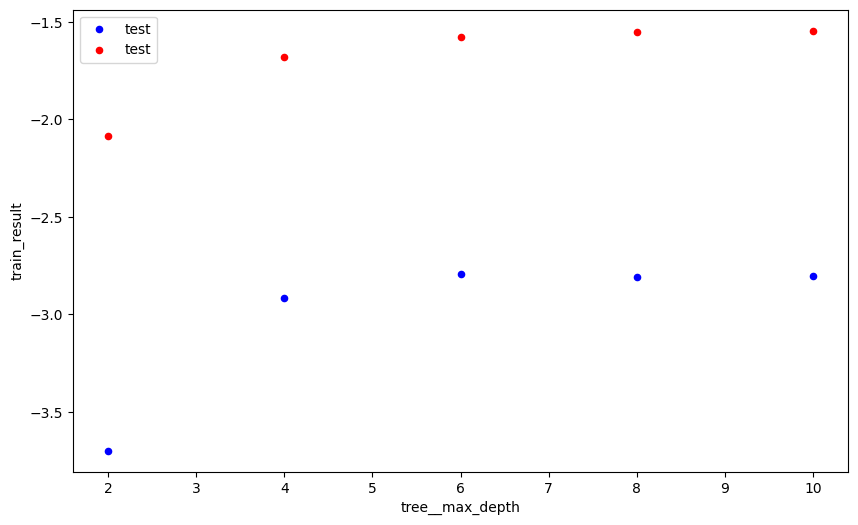

In [34]:
fig, ax = plt.subplots(figsize=(10,6))
df_res_lon[df_res_lon['tree__min_samples_leaf']==20].plot.scatter('tree__max_depth', 'test_result', label='test', ax=ax, color='blue')
df_res_lon[df_res_lon['tree__min_samples_leaf']==20].plot.scatter('tree__max_depth', 'train_result', label='test', ax=ax, color='red')
plt.legend()

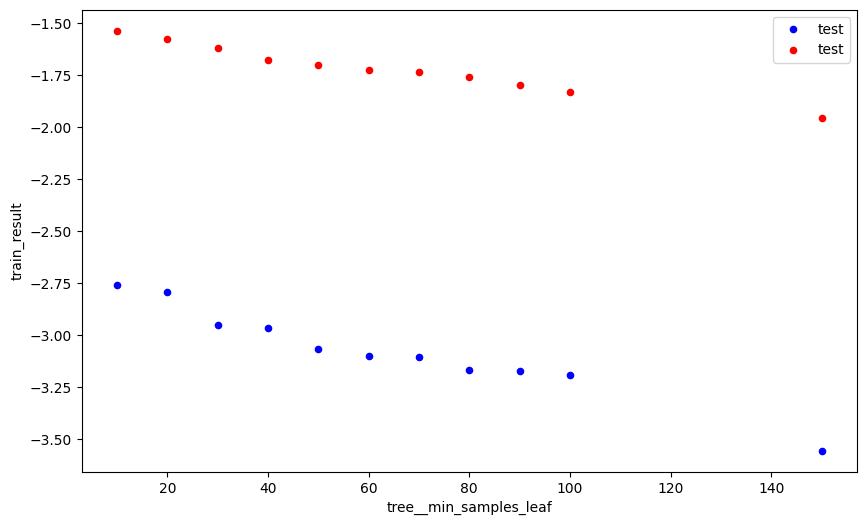

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
df_res_lon[df_res_lon['tree__max_depth']==6].plot.scatter('tree__min_samples_leaf', 'test_result', label='test', ax=ax, color='blue')
df_res_lon[df_res_lon['tree__max_depth']==6].plot.scatter('tree__min_samples_leaf', 'train_result', label='test', ax=ax, color='red')
plt.legend()

max_depth = 6

min_samples_lead = 20

## Inteligencia

In [36]:
grid_params = {
    'tree__max_depth' : [2,3,4,5,6,7,8,9],
    'tree__min_samples_leaf' : [10, 20, 50, 100, 200, 300, 500]
}

pipe = Pipeline([('scaler', MinMaxScaler()), ('tree', DecisionTreeRegressor())])

gs_dt_int = GridSearchCV(pipe, grid_params, cv=5, verbose=1, scoring='neg_mean_squared_error', return_train_score=True)

In [37]:
gs_dt_int.fit(X_int, y_int)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('tree', DecisionTreeRegressor())]),
             param_grid={'tree__max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'tree__min_samples_leaf': [10, 20, 50, 100, 200, 300,
                                                    500]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [38]:
df_res_int = pd.DataFrame(gs_dt_int.cv_results_['params'])
df_res_int['test_result'] = gs_dt_int.cv_results_['mean_test_score']
df_res_int ['train_result'] = gs_dt_int.cv_results_['mean_train_score']
df_res_int.head(3)

,tree__max_depth,tree__min_samples_leaf,test_result,train_result
0,2,10,-793.112532,-565.068973
1,2,20,-793.112532,-565.068973
2,2,50,-793.112532,-565.068973


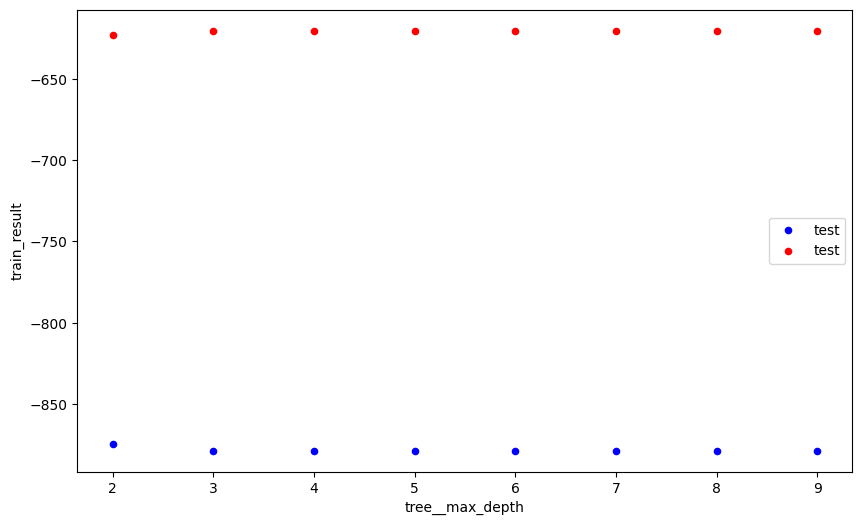

In [39]:
fig, ax = plt.subplots(figsize=(10,6))
df_res_int[df_res_int['tree__min_samples_leaf']==300].plot.scatter('tree__max_depth', 'test_result', label='test', ax=ax, color='blue')
df_res_int[df_res_int['tree__min_samples_leaf']==300].plot.scatter('tree__max_depth', 'train_result', label='test', ax=ax, color='red')
plt.legend()

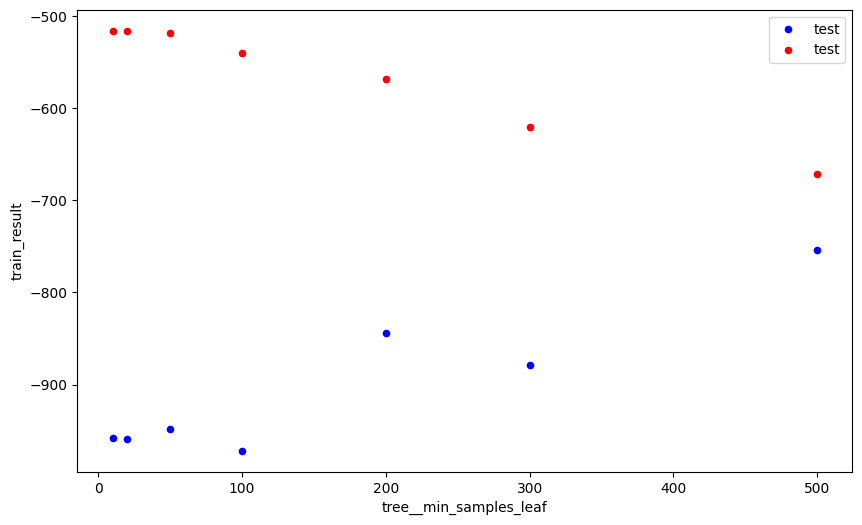

In [40]:
fig, ax = plt.subplots(figsize=(10,6))
df_res_int[df_res_int['tree__max_depth']==3].plot.scatter('tree__min_samples_leaf', 'test_result', label='test', ax=ax, color='blue')
df_res_int[df_res_int['tree__max_depth']==3].plot.scatter('tree__min_samples_leaf', 'train_result', label='test', ax=ax, color='red')
plt.legend()

max_depth = 3

min_samples_lead = 100

### Viz pred trees

In [41]:
## Inteligencia
pipe_final_dt_int = Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeRegressor(max_depth=3, min_samples_leaf=100))])
model_final_dt_int = pipe_final_dt_int.fit(X_int, y_int)
y_dt_pred_int = model_final_dt_int.predict(X_int)

## Longevidad
pipe_final_dt_lon = Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeRegressor(max_depth=6, min_samples_leaf=20))])
model_final_dt_lon = pipe_final_dt_lon.fit(X_lon, y_lon)
y_dt_pred_lon = model_final_dt_lon.predict(X_lon)

## Tamaño
pipe_final_dt_tam = Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeRegressor(max_depth=4, min_samples_leaf=90))])
model_final_dt_tam = pipe_final_dt_tam.fit(X_tam, y_tam)
y_dt_pred_tam = model_final_dt_tam.predict(X_tam)

Text(0.5, 1.0, 'Resultado D.Tree Tamaño')

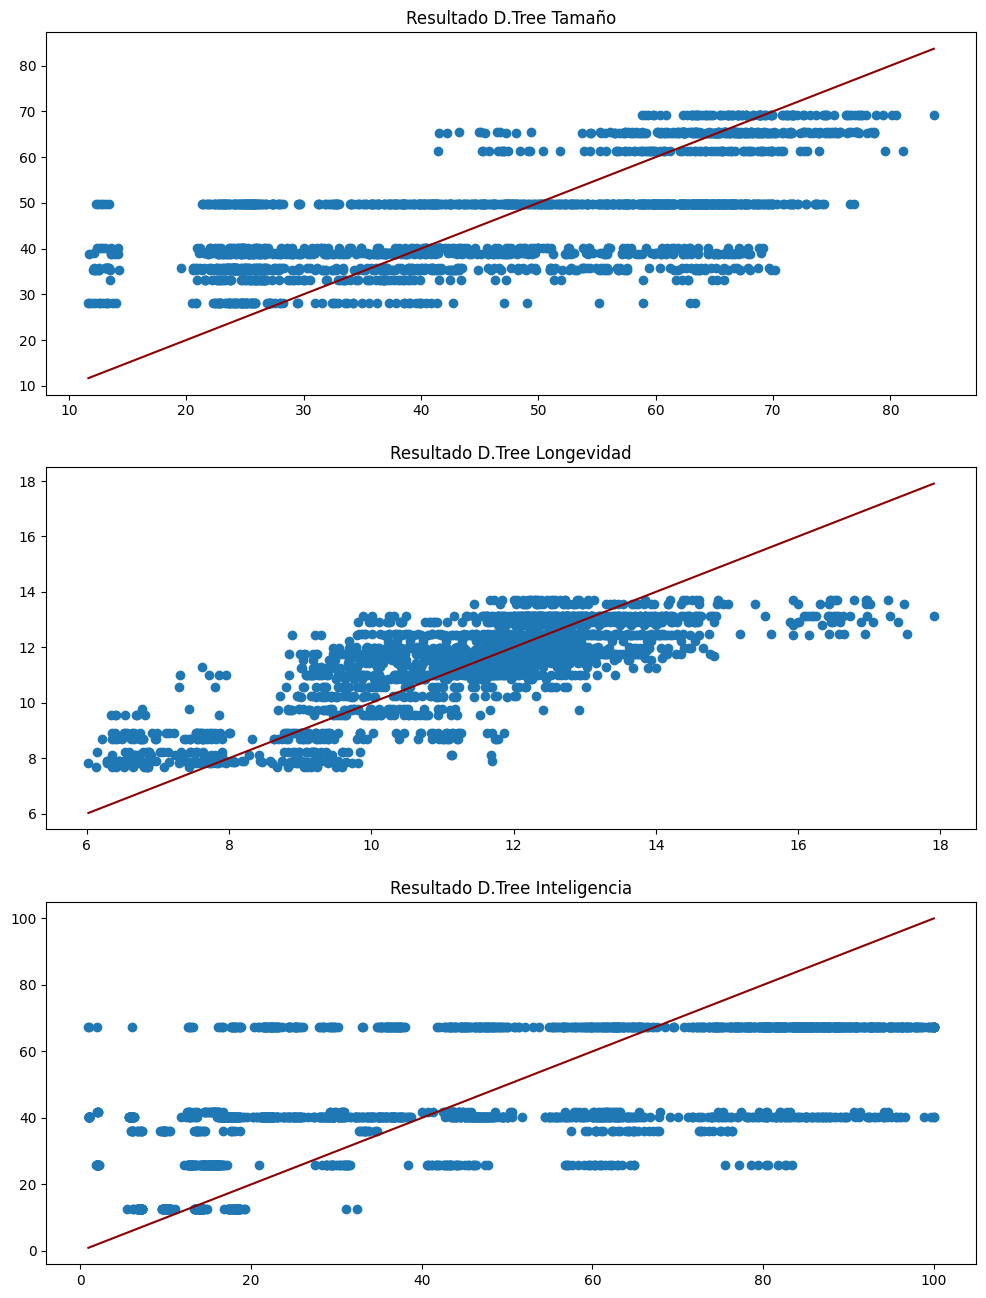

In [42]:
fig, axs = plt.subplots(3, 1, figsize=(12,16))

axs[2].scatter(y_int, y_dt_pred_int, label='Poly grado 2', color='tab:blue')
axs[2].plot([min(y_int),max(y_int)], [min(y_int),max(y_int)], color='darkred')
axs[2].set_title('Resultado D.Tree Inteligencia')

axs[1].scatter(y_lon, y_dt_pred_lon, label='Poly grado 3', color='tab:blue')
axs[1].plot([min(y_lon),max(y_lon)], [min(y_lon),max(y_lon)], color='darkred')
axs[1].set_title('Resultado D.Tree Longevidad')

axs[0].scatter(y_tam, y_dt_pred_tam, label='Regresión Lineal', color='tab:blue')
axs[0].plot([min(y_tam),max(y_tam)], [min(y_tam),max(y_tam)], color='darkred')
axs[0].set_title('Resultado D.Tree Tamaño')

In [43]:
print('Tamaño:')
print(f'MAE:  {mean_absolute_error(y_tam, y_dt_pred_tam):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_tam, y_dt_pred_tam)):.2f}')

print('Longevidad:')
print(f'MAE:  {mean_absolute_error(y_lon, y_dt_pred_lon):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_lon, y_dt_pred_lon)):.2f}')

print('Inteligencia:')
print(f'MAE:  {mean_absolute_error(y_int, y_dt_pred_int):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_int, y_dt_pred_int)):.2f}')

Tamaño:
MAE:  10.56
RMSE: 13.09
Longevidad:
MAE:  0.99
RMSE: 1.28
Inteligencia:
MAE:  19.66
RMSE: 23.70


### Viz trees

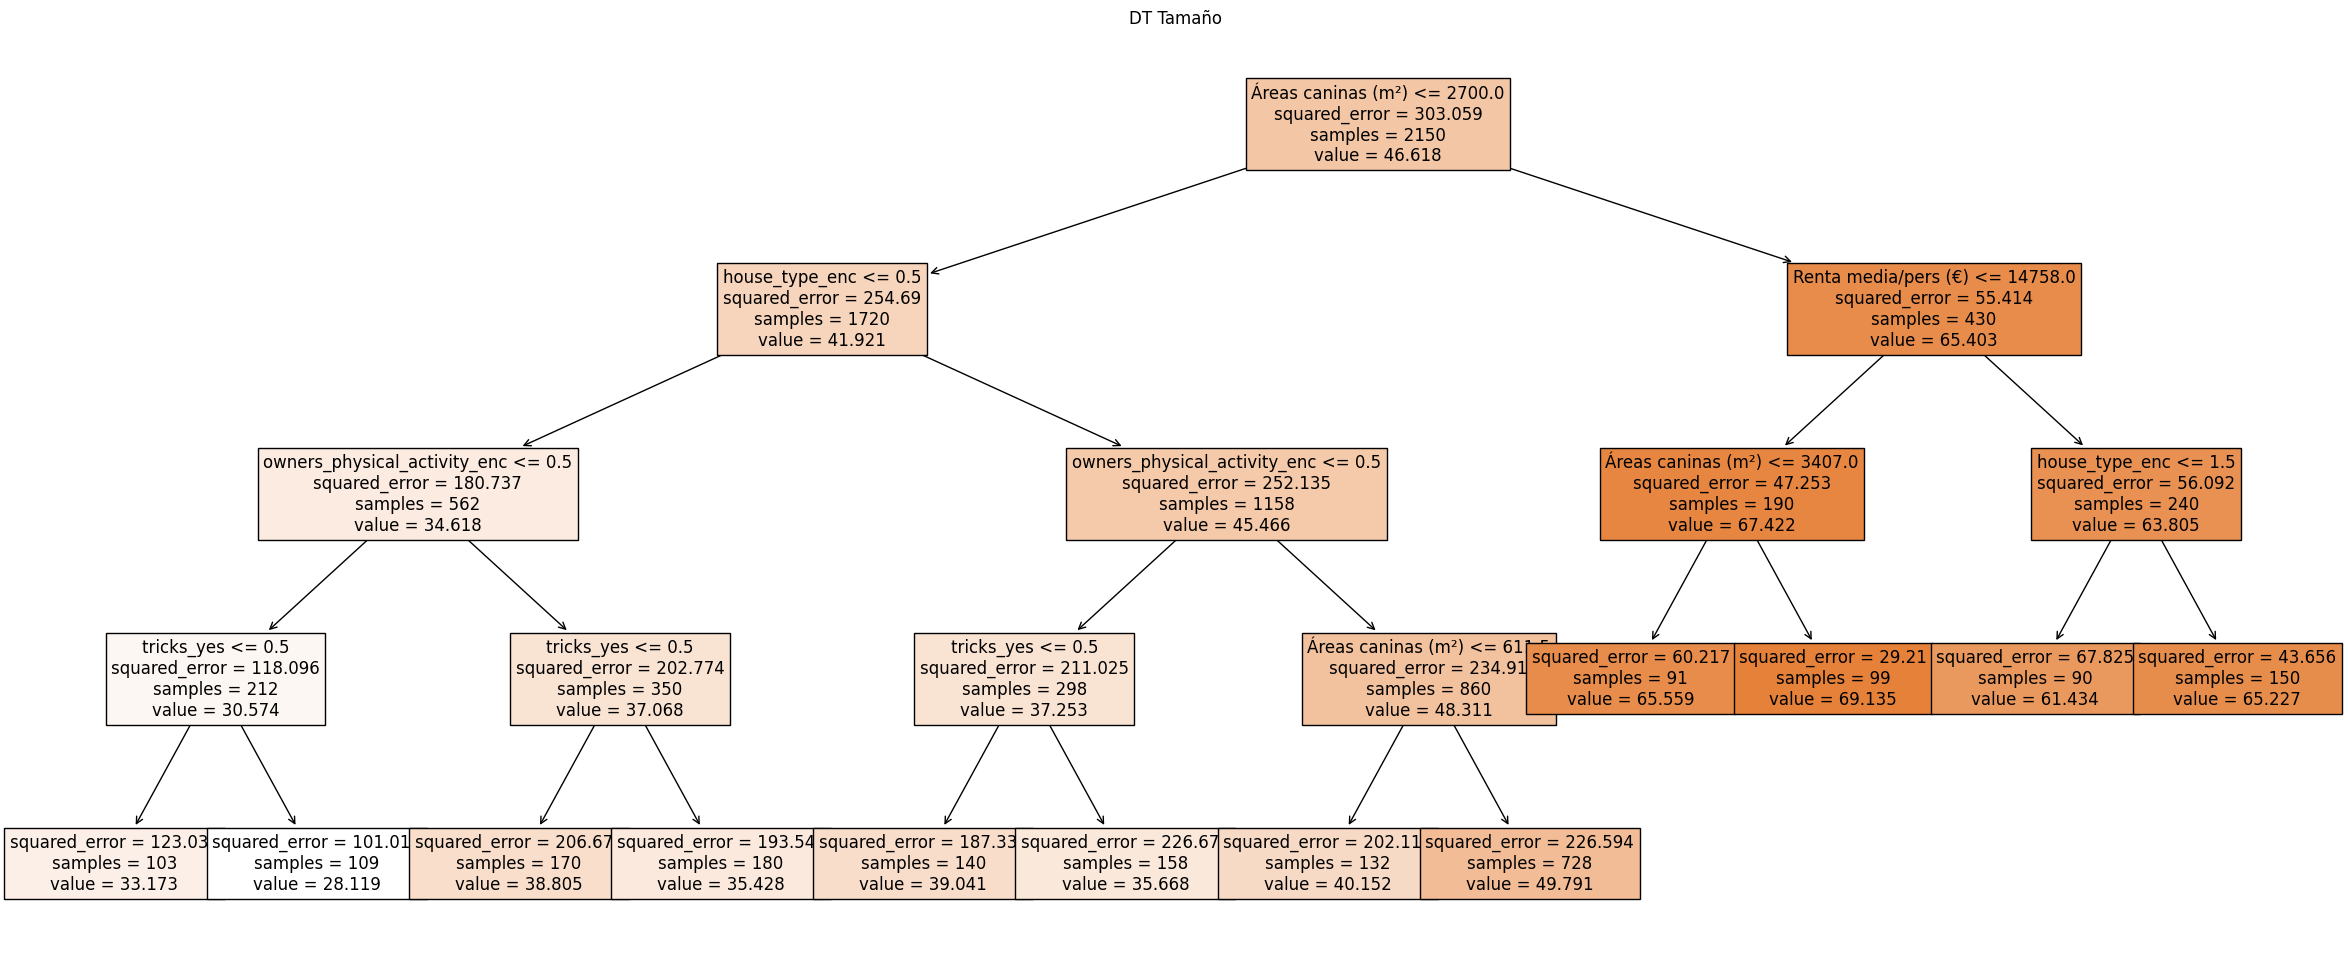

In [44]:
tree_tam = DecisionTreeRegressor(max_depth=4, min_samples_leaf=90)
tree_tam.fit(X_tam, y_tam)

fig, ax = plt.subplots(figsize=(30,12))
tree.plot_tree(tree_tam, ax=ax, feature_names=X_tam.columns, fontsize=12, filled=True)
plt.title('DT Tamaño')
plt.show()

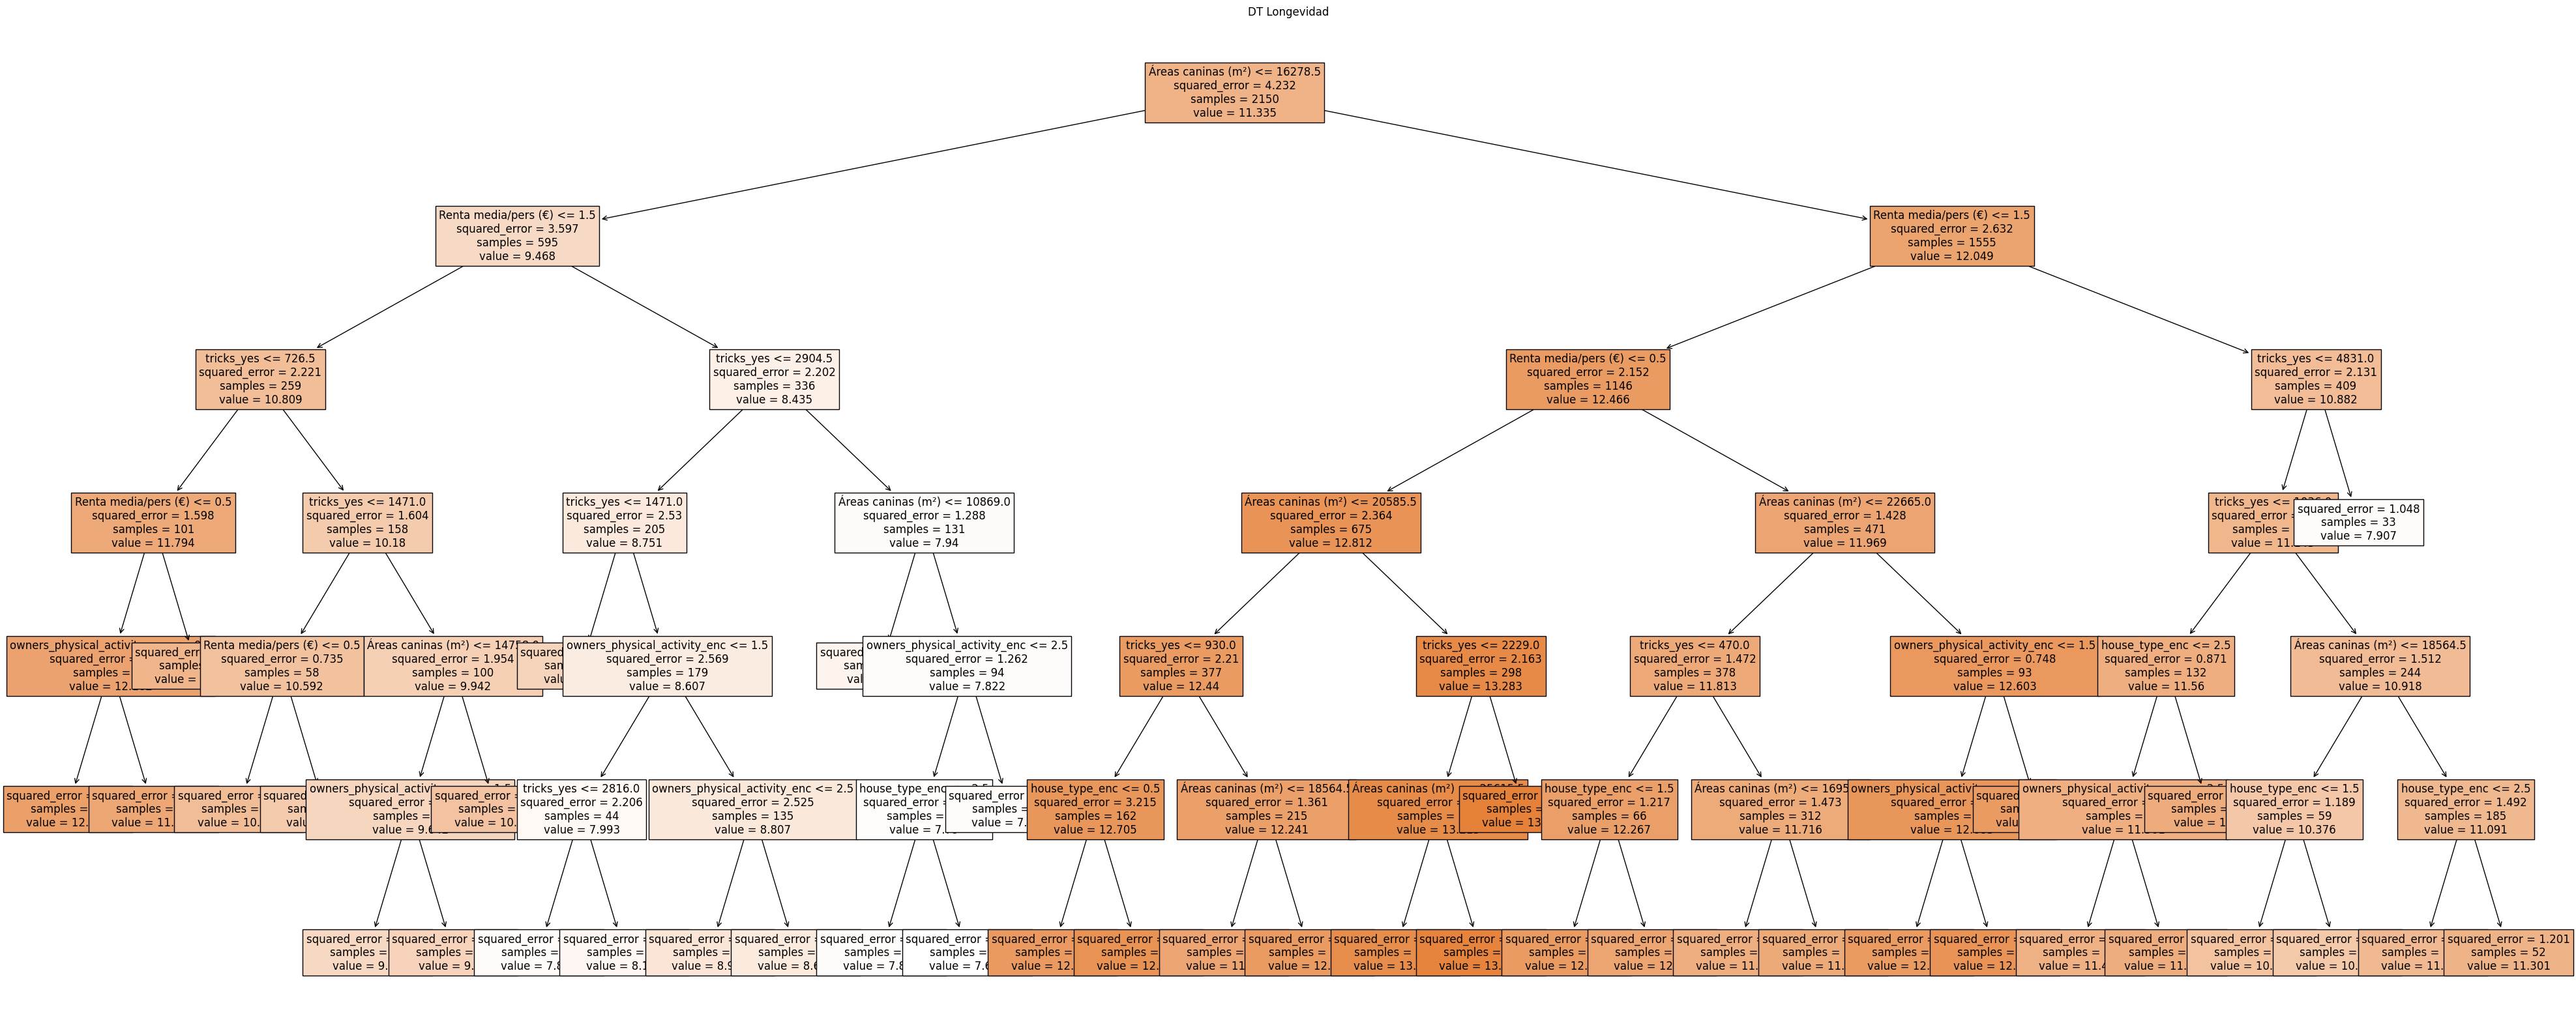

In [45]:
tree_lon = DecisionTreeRegressor(max_depth=6, min_samples_leaf=20)
tree_lon.fit(X_lon, y_lon)

fig, ax = plt.subplots(figsize=(50,20))
tree.plot_tree(tree_lon, ax=ax, feature_names=X_tam.columns, fontsize=12, filled=True)
plt.title('DT Longevidad')
plt.show()

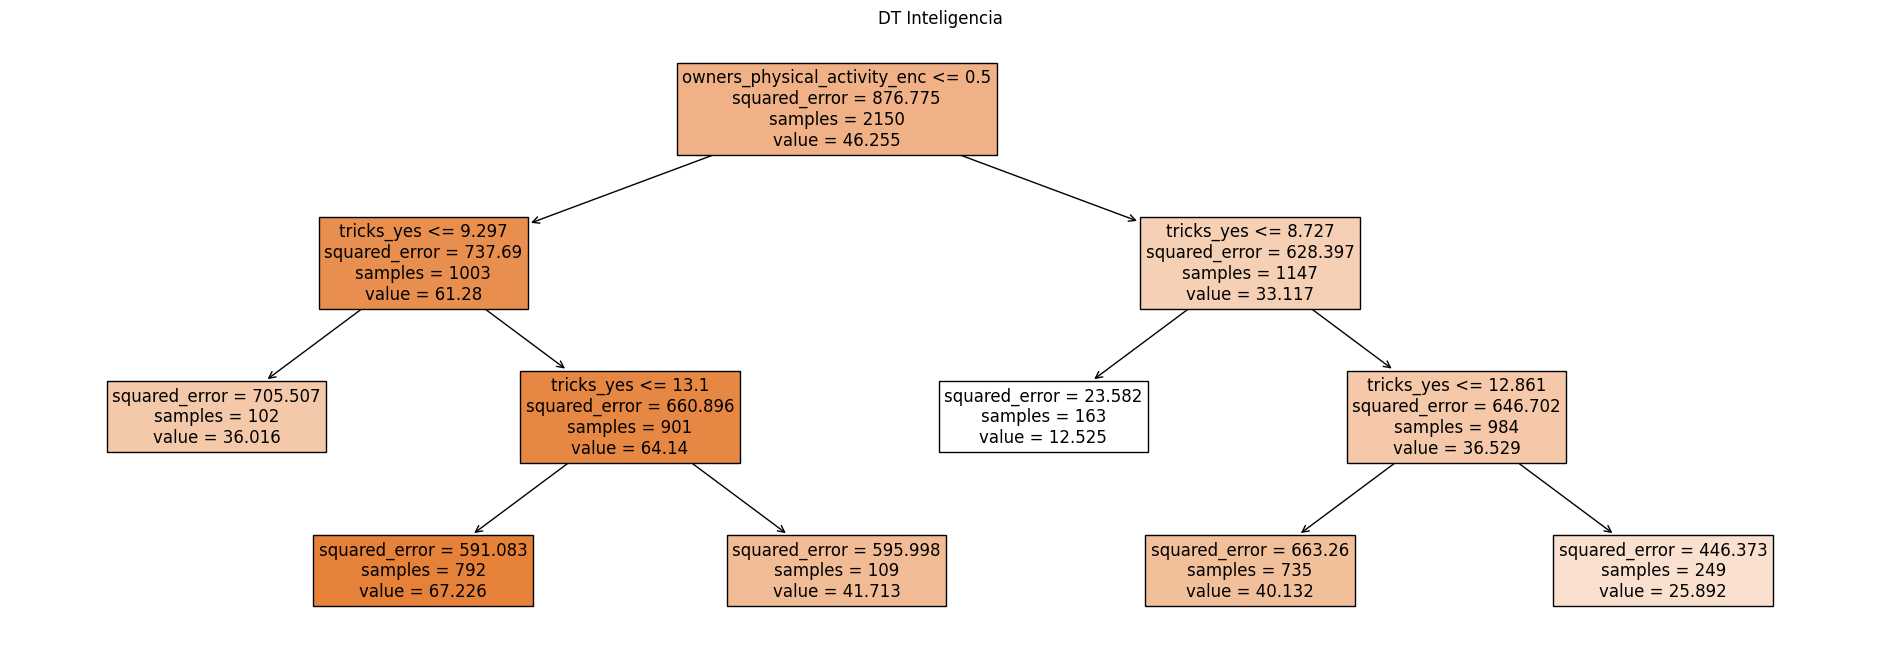

In [46]:
tree_int = DecisionTreeRegressor(max_depth=3, min_samples_leaf=100)
tree_int.fit(X_int, y_int)

fig, ax = plt.subplots(figsize=(24,8))
tree.plot_tree(tree_int, ax=ax, feature_names=X_tam.columns, fontsize=12, filled=True)
plt.title('DT Inteligencia')
plt.show()

# Lasso

## Tamaño - Lasso

 El algoritmo Lasso (Least Absolute Shrinkage and Selection Operator) es una técnica de regularización que agrega una penalización a la magnitud de los coeficientes en un modelo de regresión lineal, ayudando así a prevenir el sobreajuste y a seleccionar características importantes. Permite un modelo más simple que generaliza mejor.

In [47]:
pipe1_lasso = Pipeline([('scaler', MinMaxScaler()), ('lasso', Lasso())])
grid_params = {
    'lasso__alpha' : [0.001,0.01,0.1,0.4,1],
}
gs1_lasso = GridSearchCV(pipe1_lasso, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=True)

In [48]:

lasso_model1 = gs1_lasso.fit(X_tam, y_tam)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [49]:
#El test score más bajo lo da para alpha=0.001, por eso es el que toma como mejor parámetro. Comprobemos su diferencia con el resultado de train:
df_res = pd.DataFrame(gs1_lasso.cv_results_['params'])
df_res['test_result'] = gs1_lasso.cv_results_['mean_test_score']
df_res['train_result'] = gs1_lasso.cv_results_['mean_train_score']
df_res

,lasso__alpha,test_result,train_result
0,0.001,-239.023616,-186.866958
1,0.010,-239.188925,-186.872490
2,0.100,-241.440433,-187.425870
3,0.400,-266.082078,-194.784049
4,1.000,-298.440960,-225.130278


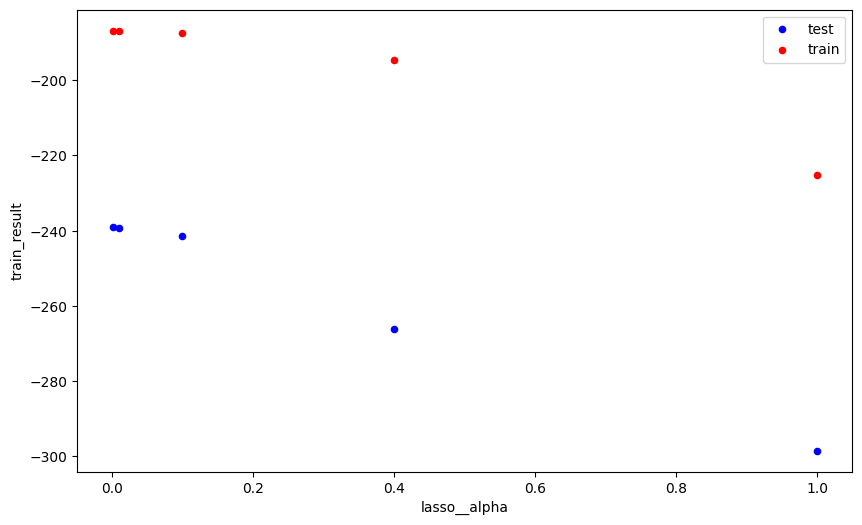

In [50]:
fig, ax = plt.subplots(figsize=(10,6))
df_res.plot.scatter('lasso__alpha', 'test_result', label='test', ax=ax, color='blue')
df_res.plot.scatter('lasso__alpha', 'train_result', label='train', ax=ax, color='red')
plt.legend()

In [51]:
#Con el gráfico anterior vemos que, evidentemente, el modelo es una mierda pero, en cualquier caso, el mejor parámetro (el que hace que resultado de train y test estén más parejos) es alpha=0.001
y_pred_tam_lasso = lasso_model1.predict(X_tam)

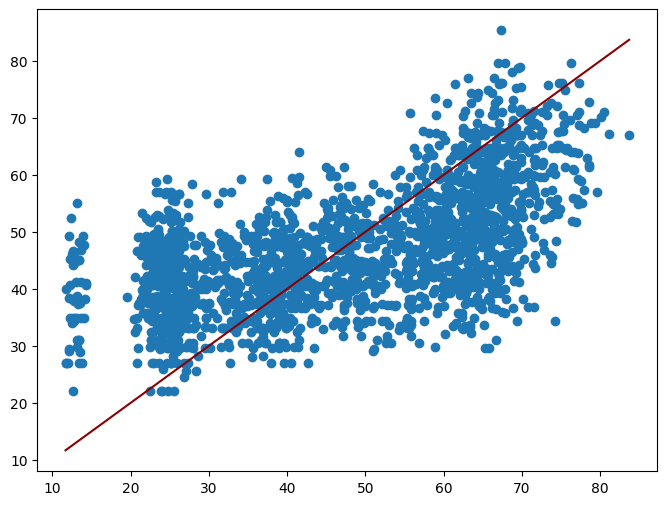

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_tam, y=y_pred_tam_lasso, color='tab:blue')
plt.plot([min(y_tam),max(y_tam)],[min(y_tam),max(y_tam)], color='darkred')

In [53]:
print(f'MAE:  {mean_absolute_error(y_tam, y_pred_tam_lasso):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_tam, y_pred_tam_lasso)):.2f}')

MAE:  11.27
RMSE: 13.82


### Longevidad - Lasso

In [54]:
pipe2_lasso = Pipeline([('scaler', MinMaxScaler()), ('lasso', Lasso())])
grid_params = {
    'lasso__alpha' : [0.001,0.01,0.1,0.4,1],
}
gs2_lasso = GridSearchCV (pipe2_lasso, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=True)

In [55]:
lasso_model2 = gs2_lasso.fit (X_lon, y_lon)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [56]:
df_res = pd.DataFrame(gs2_lasso.cv_results_['params'])
df_res['test_result'] = gs2_lasso.cv_results_['mean_test_score']
df_res['train_result'] = gs2_lasso.cv_results_['mean_train_score']
df_res

,lasso__alpha,test_result,train_result
0,0.001,-2.959409,-1.852428
1,0.010,-3.098366,-1.857152
2,0.100,-4.022942,-2.213169
3,0.400,-5.442101,-3.489938
4,1.000,-5.664335,-4.073030


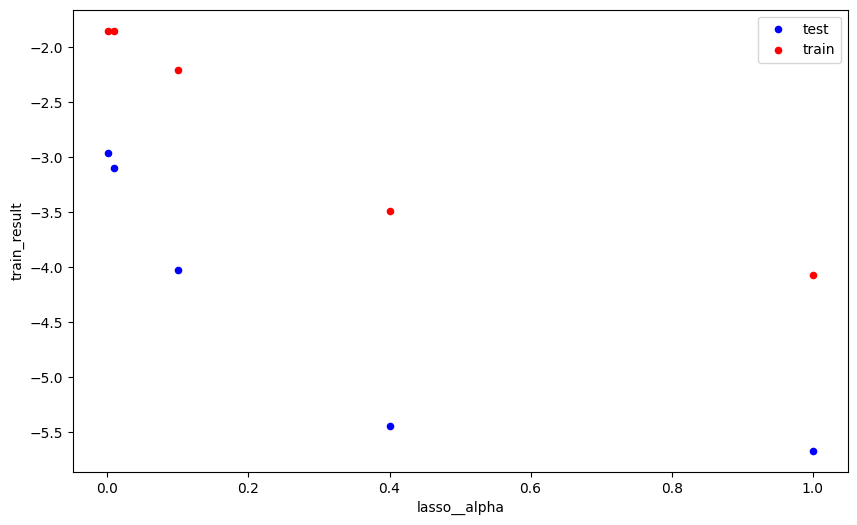

In [57]:
fig, ax = plt.subplots(figsize=(10,6))
df_res.plot.scatter('lasso__alpha', 'test_result', label='test', ax=ax, color='blue')
df_res.plot.scatter('lasso__alpha', 'train_result', label='train', ax=ax, color='red')
plt.legend()

In [58]:
#Con el gráfico anterior vemos que el mejor parámetro (el que hace que resultado de train y test estén más parejos) es alpha=0.001
y_pred_lon_lasso = lasso_model2.predict(X_lon)

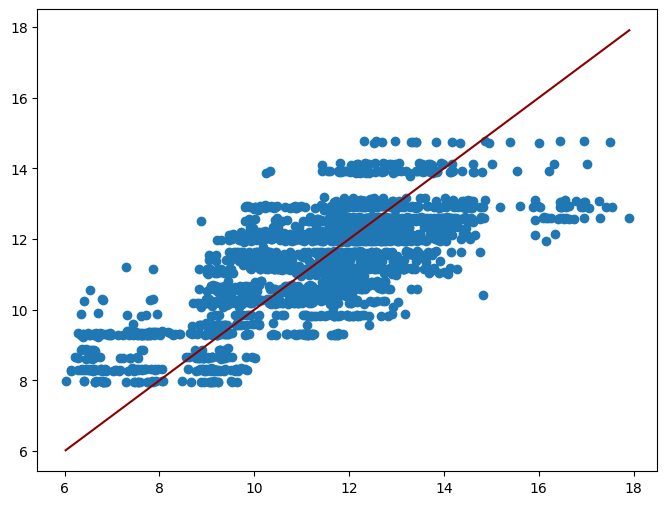

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_lon, y=y_pred_lon_lasso, color='tab:blue')
plt.plot([min(y_lon),max(y_lon)],[min(y_lon),max(y_lon)], color='darkred')

In [60]:
print('Lasso:')
print(f'MAE:  {mean_absolute_error(y_lon, y_pred_lon_lasso):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_lon, y_pred_lon_lasso)):.2f}')

Lasso:
MAE:  1.10
RMSE: 1.39


### Inteligencia - Lasso

In [61]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('lasso', Lasso())])
grid_params = {
    'lasso__alpha' : [0.001,0.01,0.1,0.4,1],
}
gs = GridSearchCV (pipe, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=False)

In [62]:
fitted_model = gs.fit (X_int, y_int)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [63]:
# Realiza predicciones en el conjunto de prueba
y_pred_int_lasso = fitted_model.predict(X_int) #es lo mismo que hacer gs.predict

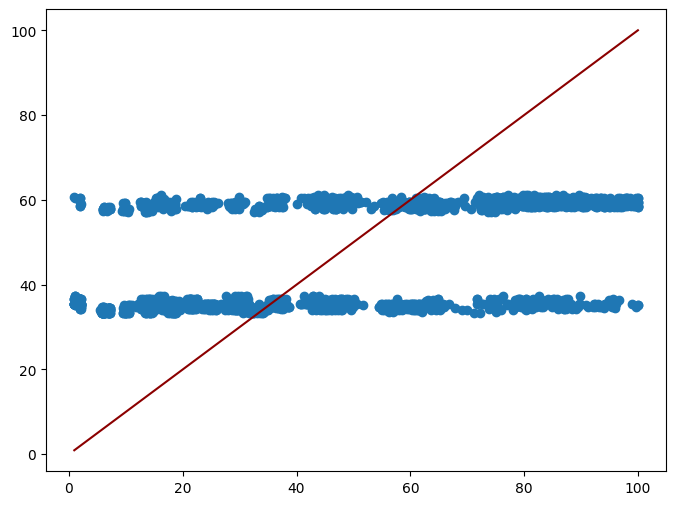

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_int, y=y_pred_int_lasso, color='tab:blue')
plt.plot([min(y_int),max(y_int)],[min(y_int),max(y_int)], color='darkred')

In [65]:
print('Lasso:')
print(f'MAE:  {mean_absolute_error(y_int, y_pred_int_lasso):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_int, y_pred_int_lasso)):.2f}')

Lasso:
MAE:  22.22
RMSE: 25.98


# SVM regression - SVR

### Tamaño - SVM


In [66]:
pipe1_svr = Pipeline([('scaler', MinMaxScaler()), ('svr', SVR())])
grid_params = {
    'svr__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__C' : [1.0, 2.0, 10.0]
}
gs1_svr= GridSearchCV(pipe1_svr, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=True)

In [67]:
svr_model1 = gs1_svr.fit(X_tam, y_tam)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [68]:
#Comprobamos diferencia entre train y test
df_res = pd.DataFrame(gs1_svr.cv_results_['params'])
df_res['test_result'] = gs1_svr.cv_results_['mean_test_score']
df_res ['train_result'] = gs1_svr.cv_results_['mean_train_score']
df_res

,svr__C,svr__kernel,test_result,train_result
0,1.0,linear,-247.689080,-189.764483
1,1.0,poly,-264.603034,-185.632079
2,1.0,rbf,-259.226815,-177.203997
3,1.0,sigmoid,-3221.254852,-2946.168553
4,2.0,linear,-240.803765,-189.256035
5,2.0,poly,-262.501061,-183.721758
6,2.0,rbf,-247.162028,-172.497390
7,2.0,sigmoid,-11806.468088,-11074.703313
8,10.0,linear,-233.894045,-189.399285
9,10.0,poly,-264.991354,-182.335764


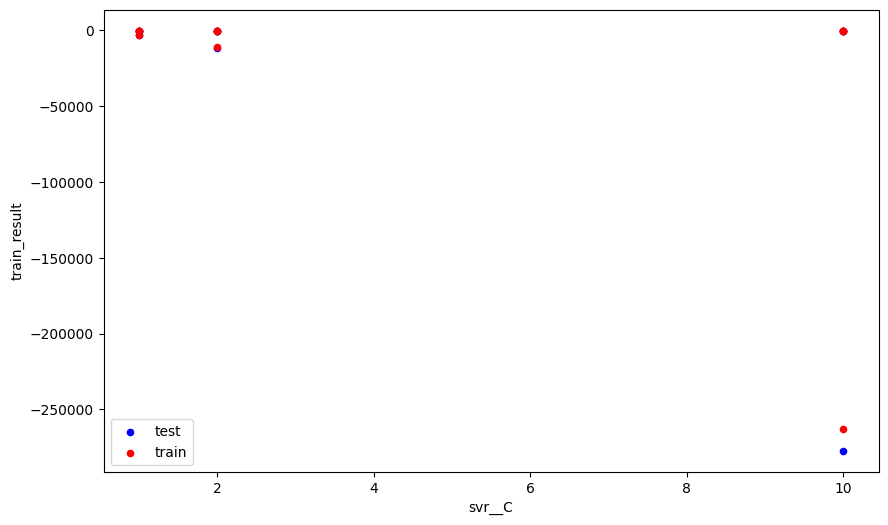

In [69]:
fig, ax = plt.subplots(figsize=(10,6))
df_res.plot.scatter('svr__C', 'test_result', label='test', ax=ax, color='blue')
df_res.plot.scatter('svr__C', 'train_result', label='train', ax=ax, color='red')
plt.legend()

In [70]:
#Observo que el kernel (es por defecto) que mejores resultados da es el rbf pero voy a afinar la malla con el parámetro C

grid_params = {
    'svr__C' : [2.0,4.0,6.0,8.0,10.0,12.0]
}
gs1_svr_fino= GridSearchCV(pipe1_svr, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=True)
gs1_svr_fino.fit(X_tam, y_tam)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [2.0, 4.0, 6.0, 8.0, 10.0, 12.0]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [71]:
df_res2 = pd.DataFrame(gs1_svr_fino.cv_results_['params'])
df_res2['test_result'] = gs1_svr_fino.cv_results_['mean_test_score']
df_res2 ['train_result'] = gs1_svr_fino.cv_results_['mean_train_score']
df_res2

,svr__C,test_result,train_result
0,2.0,-247.162028,-172.497390
1,4.0,-238.654051,-169.347004
2,6.0,-234.053316,-167.759942
3,8.0,-231.403715,-166.777401
4,10.0,-229.146044,-166.098743
5,12.0,-227.256126,-165.568779


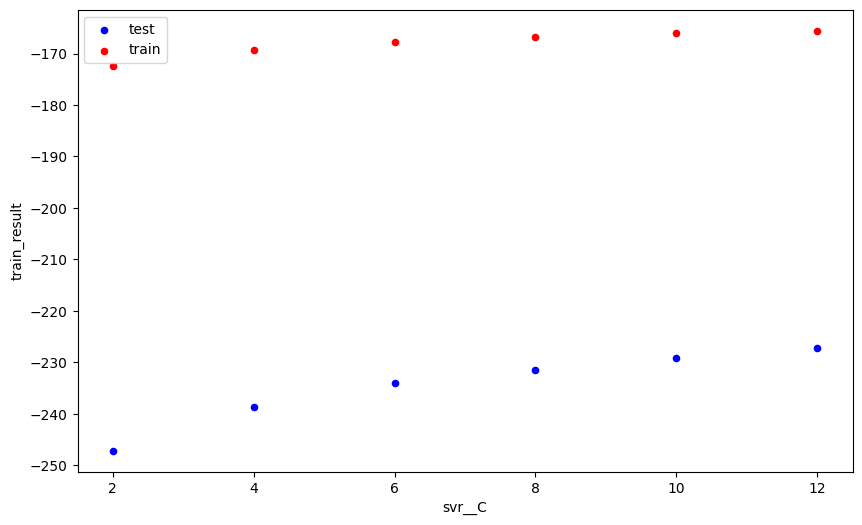

In [72]:
fig, ax = plt.subplots(figsize=(10,6))
df_res2.plot.scatter('svr__C', 'test_result', label='test', ax=ax, color='blue')
df_res2.plot.scatter('svr__C', 'train_result', label='train', ax=ax, color='red')
plt.legend()

Observamos que, en todos los casos, la diferencia entre test y train es bastante grande, y que el valor de test mejora cuanto mayor es C.

Pero, también, cuanto mayor es C,menor es la fuerza de regularización de este parámetro, por lo que el modelo estaría más sobreentrenado.

Por tanto, me quedaría con un valor de C entre 4 y 6, ya que la diferencia entre train y test es parecida y no me arriesgo a perder la regularización que aporta C

In [73]:

pipe1_final = Pipeline([('scaler', MinMaxScaler()), ('svr', SVR(C=5.0, kernel='rbf'))])
final_svr_model = pipe1_final.fit(X_tam, y_tam)
y_pred_tam_svr = final_svr_model.predict(X_tam)


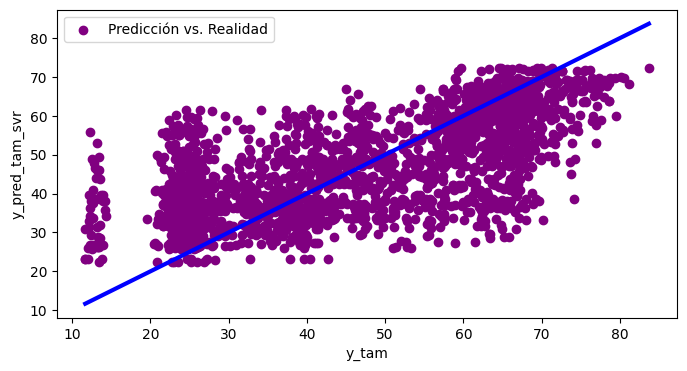

In [74]:
# Visualiza la predicción vs. los datos reales
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x=y_tam, y=y_pred_tam_svr, color='purple', label='Predicción vs. Realidad')
ax.plot([min(y_tam), max(y_tam)], [min(y_tam), max(y_tam)], color='blue', linewidth=3)

ax.set_xlabel('y_tam')
ax.set_ylabel('y_pred_tam_svr')

ax.legend()


In [75]:
print(f'MAE:  {mean_absolute_error(y_tam, y_pred_tam_svr):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_tam, y_pred_tam_svr)):.2f}')

MAE:  10.13
RMSE: 13.11


### Longevidad - SVM

In [76]:
pipe2_svr = Pipeline([('scaler', MinMaxScaler()), ('svr', SVR())])
grid_params = {
    'svr__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__C' : [1.0, 2.0, 6.0, 10.0]
}
gs2_svr= GridSearchCV(pipe2_svr, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=True)

In [77]:
svr_model2 = gs2_svr.fit(X_lon, y_lon)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [78]:
df_res = pd.DataFrame(gs2_svr.cv_results_['params'])
df_res['test_result'] = gs2_svr.cv_results_['mean_test_score']
df_res ['train_result'] = gs2_svr.cv_results_['mean_train_score']
df_res

,svr__C,svr__kernel,test_result,train_result
0,1.0,linear,-3.179130,-1.870838
1,1.0,poly,-2.853229,-1.880907
2,1.0,rbf,-2.891185,-1.667634
3,1.0,sigmoid,-2891.143384,-2578.954874
4,2.0,linear,-3.159838,-1.868763
5,2.0,poly,-2.825776,-1.865517
6,2.0,rbf,-2.834961,-1.630378
7,2.0,sigmoid,-11449.920711,-10236.429048
8,6.0,linear,-3.156956,-1.868157
9,6.0,poly,-2.800302,-1.847978


#Vemos que kernel=poly es claramente mejor que el resto. Ahora, vamos a comparar, con el factor C, la diferencia entre train y test

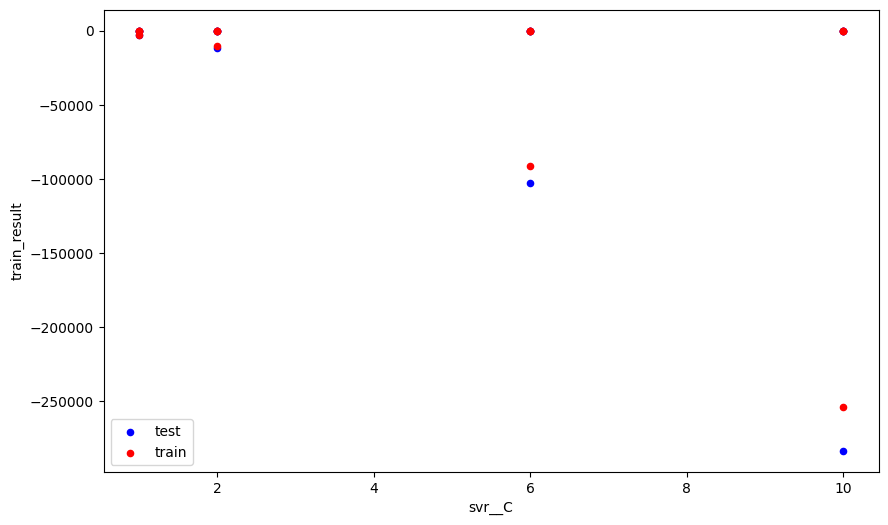

In [79]:
fig, ax = plt.subplots(figsize=(10,6))
df_res.plot.scatter('svr__C', 'test_result', label='test', ax=ax, color='blue')
df_res.plot.scatter('svr__C', 'train_result', label='train', ax=ax, color='red')
plt.legend()

In [80]:
#Aunque el best_estimator me da que C=10 es lo mejor, observo que ahí la diferencia entre train y test es muy grande. Voy a afinal el gs.
grid_params = {
    # 'svr__kernel' : ['poly'],
    'svr__C' : [1.0,1.5,2.0,2.5, 3.0, 4.0]
}
gs2_svr_fino = GridSearchCV(pipe2_svr, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=True)
gs2_svr_fino.fit(X_lon, y_lon)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [1.0, 1.5, 2.0, 2.5, 3.0, 4.0]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [81]:
df_res2 = pd.DataFrame(gs2_svr_fino.cv_results_['params'])
df_res2['test_result'] = gs2_svr_fino.cv_results_['mean_test_score']
df_res2 ['train_result'] = gs2_svr_fino.cv_results_['mean_train_score']
df_res2

,svr__C,test_result,train_result
0,1.0,-2.891185,-1.667634
1,1.5,-2.862581,-1.645930
2,2.0,-2.834961,-1.630378
3,2.5,-2.821632,-1.618374
4,3.0,-2.818009,-1.609500
5,4.0,-2.815861,-1.595698


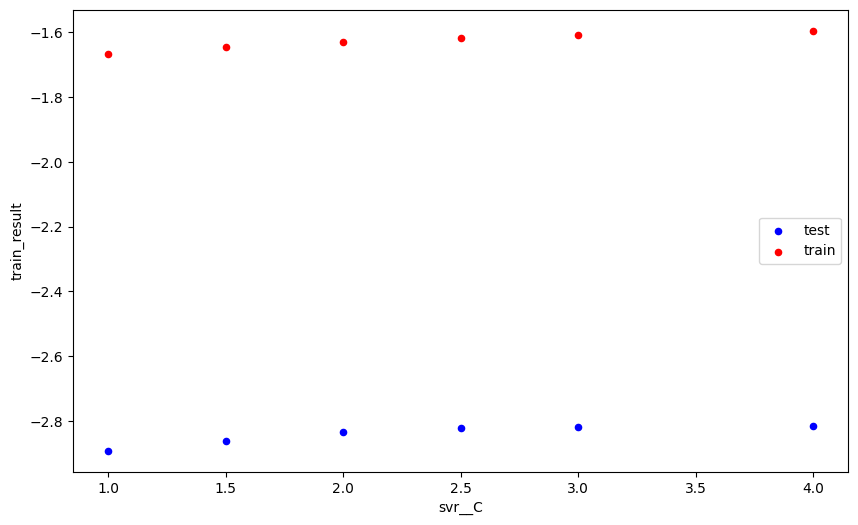

In [82]:
fig, ax = plt.subplots(figsize=(10,6))
df_res2.plot.scatter('svr__C', 'test_result', label='test', ax=ax, color='blue')
df_res2.plot.scatter('svr__C', 'train_result', label='train', ax=ax, color='red')
plt.legend()

#La diferencia entre train y test no varía mucho, pero el restultado de test es un poco mejor para C=2.5, por lo que es el parámetro que consideraremos como óptimo

In [83]:
pipe2_final = Pipeline([('scaler', MinMaxScaler()), ('svr', SVR(C=2.5, kernel='poly'))])
final_svr_model2 = pipe2_final.fit(X_lon, y_lon)
y_pred_lon_svr = final_svr_model2.predict(X_lon)

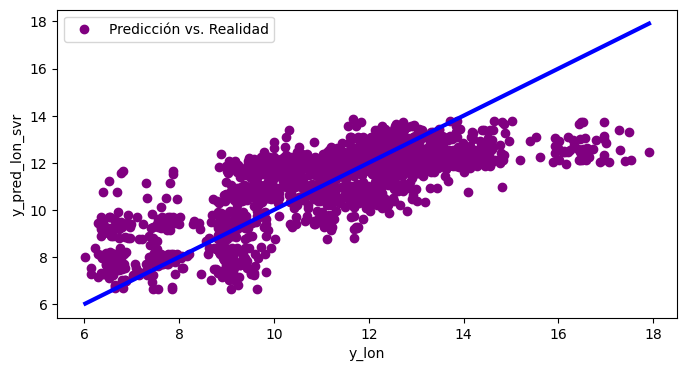

In [84]:
# Visualiza la predicción vs. los datos reales
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x=y_lon, y=y_pred_lon_svr, color='purple', label='Predicción vs. Realidad')
ax.plot([min(y_lon), max(y_lon)], [min(y_lon), max(y_lon)], color='blue', linewidth=3)

ax.set_xlabel('y_lon')
ax.set_ylabel('y_pred_lon_svr')

ax.legend()

In [85]:
print('SVR:')
print(f'MAE:  {mean_absolute_error(y_lon, y_pred_lon_svr):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_lon, y_pred_lon_svr)):.2f}')

SVR:
MAE:  1.07
RMSE: 1.39


### Inteligencia - SVM

In [86]:
pipe3_svr = Pipeline([('scaler', MinMaxScaler()), ('svr', SVR())])
grid_params = {
    'svr__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__C' : [1.0, 2.0, 3.0, 4.0]
}
gs3_svr= GridSearchCV(pipe3_svr, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=True)

In [87]:
svr_model3 = gs3_svr.fit (X_int, y_int)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [88]:
df_res = pd.DataFrame(gs3_svr.cv_results_['params'])
df_res['test_result'] = gs3_svr.cv_results_['mean_test_score']
df_res ['train_result'] = gs3_svr.cv_results_['mean_train_score']
df_res

,svr__C,svr__kernel,test_result,train_result
0,1.0,linear,-983.268269,-647.145540
1,1.0,poly,-1534.702621,-574.807366
2,1.0,rbf,-1053.794584,-586.305366
3,1.0,sigmoid,-2761.838068,-2583.548349
4,2.0,linear,-1027.976498,-650.186170
5,2.0,poly,-1626.442832,-564.941763
6,2.0,rbf,-1142.447748,-576.296822
7,2.0,sigmoid,-9835.825631,-9322.739799
8,3.0,linear,-1028.830689,-651.797763
9,3.0,poly,-1696.709838,-558.153986


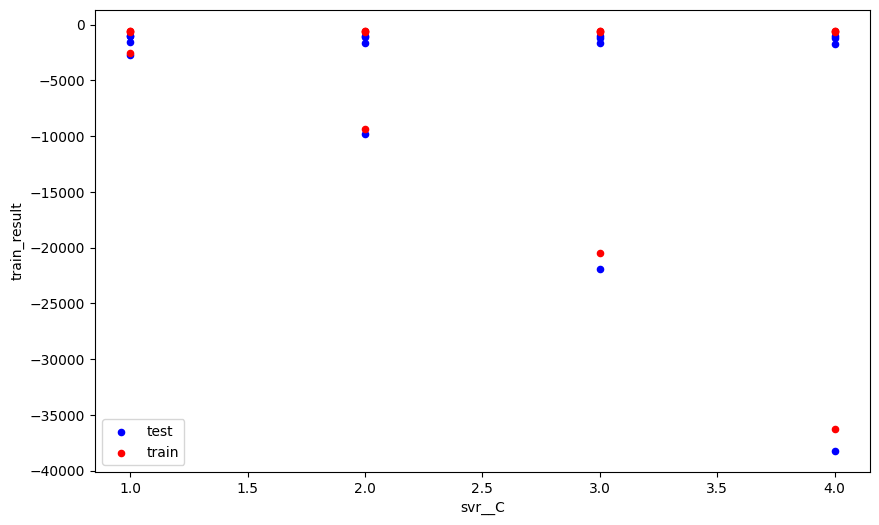

In [89]:
fig, ax = plt.subplots(figsize=(10,6))
df_res.plot.scatter('svr__C', 'test_result', label='test', ax=ax, color='blue')
df_res.plot.scatter('svr__C', 'train_result', label='train', ax=ax, color='red')
plt.legend()

In [90]:
grid_params = {
    'svr__kernel' : ['rbf'],
    'svr__C' : [0.01, 0.1,0.2,0.3, 1.0]
}
gs3_svr_fino= GridSearchCV(pipe3_svr, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=True)

In [91]:
gs3_svr_fino.fit(X_int, y_int)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.01, 0.1, 0.2, 0.3, 1.0],
                         'svr__kernel': ['rbf']},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [92]:
df_res2 = pd.DataFrame(gs3_svr_fino.cv_results_['params'])
df_res2['test_result'] = gs3_svr_fino.cv_results_['mean_test_score']
df_res2 ['train_result'] = gs3_svr_fino.cv_results_['mean_train_score']
df_res2

,svr__C,svr__kernel,test_result,train_result
0,0.01,rbf,-1110.959623,-854.321346
1,0.10,rbf,-984.879573,-708.523567
2,0.20,rbf,-951.053393,-643.546391
3,0.30,rbf,-961.465476,-615.146452
4,1.00,rbf,-1053.794584,-586.305366


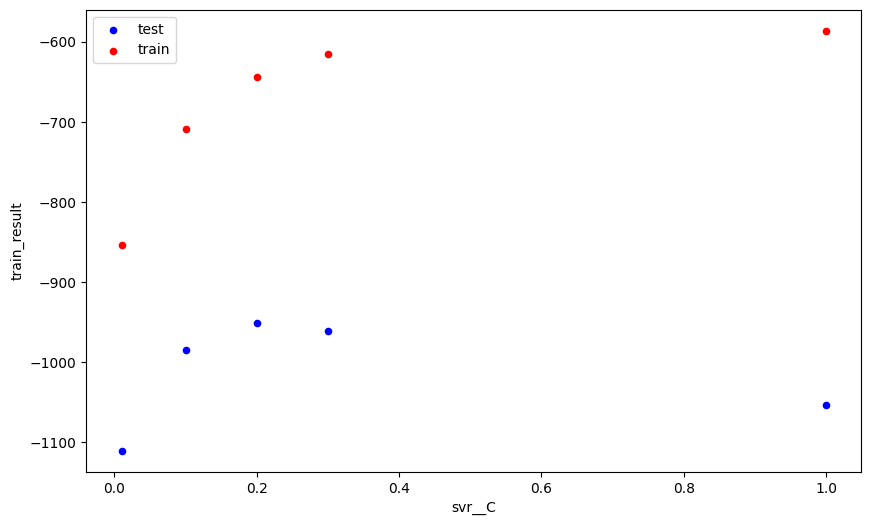

In [93]:
fig, ax = plt.subplots(figsize=(10,6))
df_res2.plot.scatter('svr__C', 'test_result', label='test', ax=ax, color='blue')
df_res2.plot.scatter('svr__C', 'train_result', label='train', ax=ax, color='red')
plt.legend()

In [94]:
#me quedo con los parámetros C=0.2 y Kernel=rbf
pipe3_final = Pipeline([('scaler', MinMaxScaler()), ('svr', SVR(C=0.2, kernel='rbf'))])
final_svr_model3 = pipe3_final.fit(X_int, y_int)
y_pred_int_svr = final_svr_model3.predict(X_int)

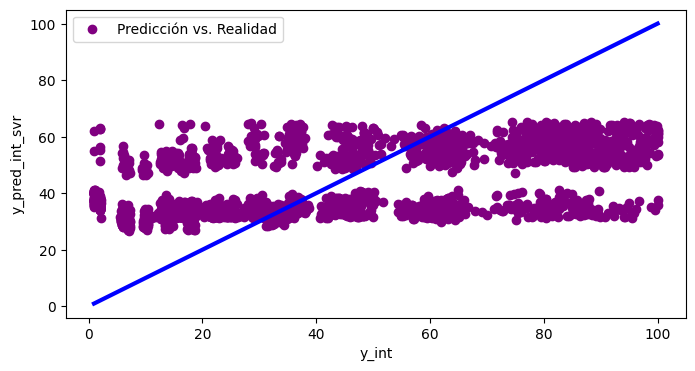

In [95]:
# Visualiza la predicción vs. los datos reales
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x=y_int, y=y_pred_int_svr, color='purple', label='Predicción vs. Realidad')
ax.plot([min(y_int), max(y_int)], [min(y_int), max(y_int)], color='blue', linewidth=3)

ax.set_xlabel('y_int')
ax.set_ylabel('y_pred_int_svr')

ax.legend()

In [96]:
print('SVR:')
print(f'MAE:  {mean_absolute_error(y_int, y_pred_int_svr):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_int, y_pred_int_svr)):.2f}')

SVR:
MAE:  21.74
RMSE: 25.59


# Random Forest Regressor - RFR

### Tamaño - Random Forest

In [97]:
pipe1_rf = Pipeline([('scaler', MinMaxScaler()), ('rfr', RandomForestRegressor())])
grid_params = {
    #'rfr__n_estimators' : [10, 30, 50,70, 100, 120, 150],
    #'rfr__max_depth' : [5, 10, 15, 20],
    'rfr__min_samples_split' : [5, 10, 15, 20]
}
gs1_rf= GridSearchCV(pipe1_rf, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=True)

In [98]:
rf_model1 = gs1_rf.fit(X_tam, y_tam)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [99]:
df_res = pd.DataFrame(gs1_rf.cv_results_['params'])
df_res['test_result'] = gs1_rf.cv_results_['mean_test_score']
df_res ['train_result'] = gs1_rf.cv_results_['mean_train_score']
df_res

,rfr__min_samples_split,test_result,train_result
0,5,-220.335954,-115.858092
1,10,-211.420405,-123.919052
2,15,-205.974076,-129.713519
3,20,-203.653702,-133.606123


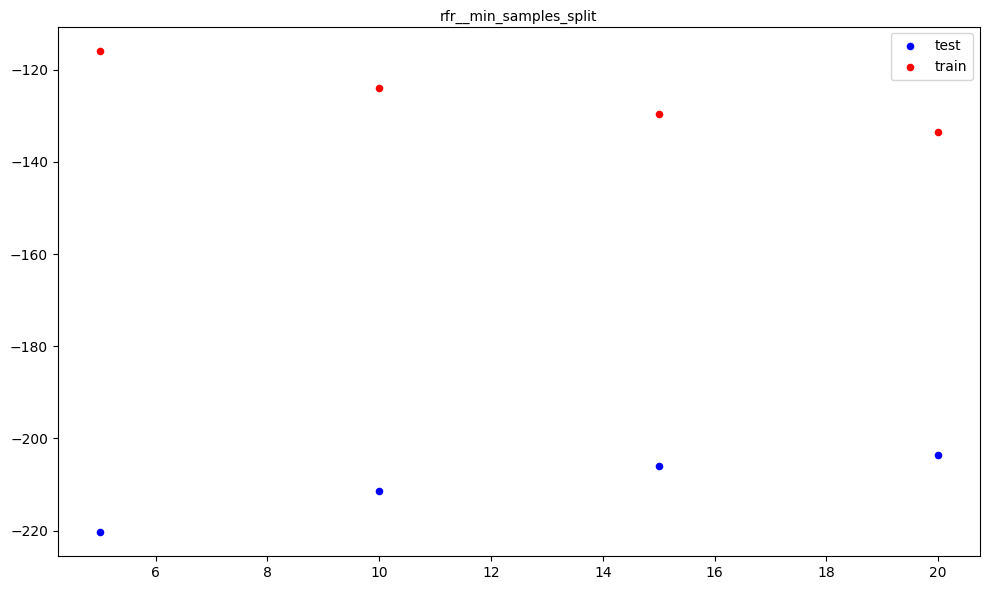

In [100]:
fig, ax = plt.subplots(figsize=(10,6))
# df_res.plot.scatter('rfr__n_estimators', 'test_result', ax=ax, color='blue')
# df_res.plot.scatter('rfr__n_estimators', 'train_result', ax=ax, color='red')
# ax.legend(labels=['test', 'train'], loc='center')
# ax.set_ylabel('')
# ax.xaxis.set_label_position('top')

# df_res.plot.scatter('rfr__max_depth', 'test_result', label='test', ax=axes[1], color='blue')
# df_res.plot.scatter('rfr__max_depth', 'train_result', label='train', ax=axes[1], color='red')
# axes[1].legend()
# axes[1].set_ylabel('')
# axes[1].xaxis.set_label_position('top')

df_res.plot.scatter('rfr__min_samples_split', 'test_result', label='test', ax=ax, color='blue')
df_res.plot.scatter('rfr__min_samples_split', 'train_result', label='train', ax=ax, color='red')
ax.legend()
ax.set_ylabel('')
ax.xaxis.set_label_position('top')

plt.tight_layout()
plt.show()


Para min_sample_splits obtengo 20 como parámetro óptimo, pero veo por el gráfico que podría estar entre 15 y 20

Para n_estimators, por el gráfico, veo que lo mejor sería alrededor de 70

Para max_depth obtengo 3 como mejor parámetro

In [101]:
pipe1_final = Pipeline([('scaler',StandardScaler()), ('rfr', RandomForestRegressor(n_estimators=70, min_samples_split=30, max_depth=3))])
final_rf_model1 = pipe1_final.fit(X_tam, y_tam)
y_pred_tam_rf = final_rf_model1.predict(X_tam)

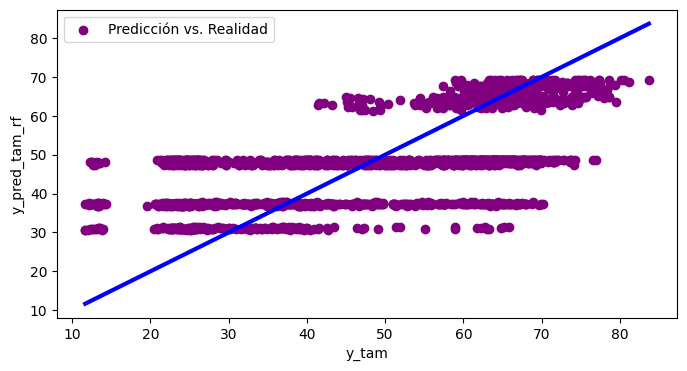

In [102]:
# Visualiza la predicción vs. los datos reales
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x=y_tam, y=y_pred_tam_rf, color='purple', label='Predicción vs. Realidad')
ax.plot([min(y_tam), max(y_tam)], [min(y_tam), max(y_tam)], color='blue', linewidth=3)

ax.set_xlabel('y_tam')
ax.set_ylabel('y_pred_tam_rf')

ax.legend()

In [103]:
print('Random Forest:')
print(f'MAE:  {mean_absolute_error(y_tam, y_pred_tam_rf):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_tam, y_pred_tam_rf)):.2f}')

Random Forest:
MAE:  10.69
RMSE: 13.25


### Longevidad - Random Forest

In [104]:
pipe2_rf = Pipeline([('scaler', MinMaxScaler()), ('rfr', RandomForestRegressor(random_state=42))])
grid_params = {
    'rfr__n_estimators' : [10, 30, 50,70, 100, 120, 150],
    #'rfr__max_depth' : [5, 10, 15, 20],
    #'rfr__min_samples_split' : [5, 10, 15, 20]
}
gs2_rf= GridSearchCV(pipe2_rf, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=True)

In [105]:
rf_model2 = gs2_rf.fit(X_lon, y_lon)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


In [106]:
df_res = pd.DataFrame(gs2_rf.cv_results_['params'])
df_res['test_result'] = gs2_rf.cv_results_['mean_test_score']
df_res ['train_result'] = gs2_rf.cv_results_['mean_train_score']
df_res

,rfr__n_estimators,test_result,train_result
0,10,-3.030960,-1.172395
1,30,-2.975201,-1.152001
2,50,-2.999297,-1.147395
3,70,-2.991229,-1.145338
4,100,-2.987264,-1.143631
5,120,-2.989262,-1.143052
6,150,-2.990039,-1.142429


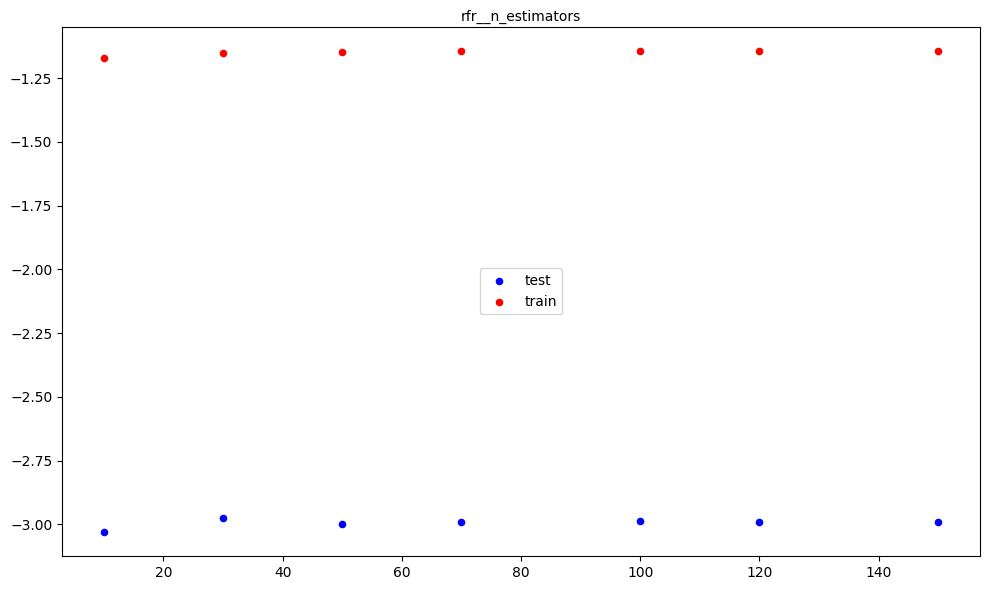

In [107]:
fig, ax = plt.subplots(figsize=(10,6))
df_res.plot.scatter('rfr__n_estimators', 'test_result', ax=ax, color='blue')
df_res.plot.scatter('rfr__n_estimators', 'train_result', ax=ax, color='red')
ax.legend(labels=['test', 'train'], loc='center')
ax.set_ylabel('')
ax.xaxis.set_label_position('top')

# df_res.plot.scatter('rfr__max_depth', 'test_result', label='test', ax=ax, color='blue')
# df_res.plot.scatter('rfr__max_depth', 'train_result', label='train', ax=ax, color='red')
# ax.legend(labels=['test', 'train'])
# ax.set_ylabel('')
# ax.xaxis.set_label_position('top')


# df_res.plot.scatter('rfr__min_samples_split', 'test_result', label='test', ax=ax, color='blue')
# df_res.plot.scatter('rfr__min_samples_split', 'train_result', label='train', ax=ax, color='red')
# ax.legend()
# ax.set_ylabel('')
# ax.xaxis.set_label_position('top')

plt.tight_layout()
plt.show()

Obtengo como best_params: max_depth=10, n_estimators=50 y min_sample_split=20

max_depth voy a afinar entre 6 y 10, n_estimators entre 50 y 70 y min_sample_split entre 12 y 14


In [108]:
grid_params = {
    'rfr__n_estimators' : [50,60,70],
    'rfr__max_depth' : [6,8,10],
    'rfr__min_samples_split' : [12,13,14]
}
gs2_rf_fino= GridSearchCV(pipe2_rf, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=True)

In [109]:
rf_model2_fino = gs2_rf_fino.fit(X_lon, y_lon)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [110]:
df_res2 = pd.DataFrame(rf_model2_fino.cv_results_['params'])
df_res2['test_result'] = rf_model2_fino.cv_results_['mean_test_score']
df_res2 ['train_result'] = rf_model2_fino.cv_results_['mean_train_score']

In [111]:
pipe2_final = Pipeline([('scaler', StandardScaler()), ('rfr', RandomForestRegressor(n_estimators=60, min_samples_split=13, max_depth=8))])
final_rf_model2 = pipe2_final.fit(X_lon, y_lon)
y_pred_lon_rf = final_rf_model2.predict(X_lon)

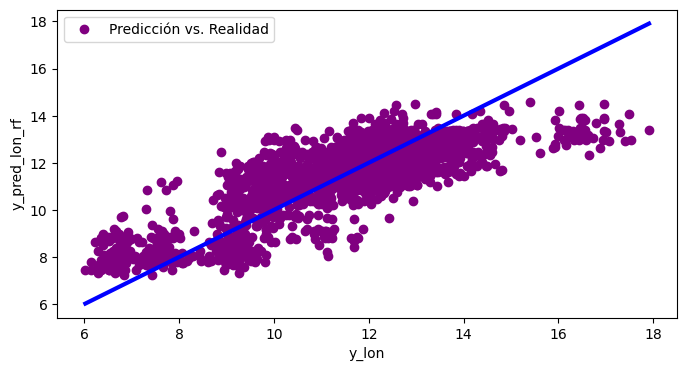

In [112]:
# Visualiza la predicción vs. los datos reales
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x=y_lon, y=y_pred_lon_rf, color='purple', label='Predicción vs. Realidad')
ax.plot([min(y_lon), max(y_lon)], [min(y_lon), max(y_lon)], color='blue', linewidth=3)

ax.set_xlabel('y_lon')
ax.set_ylabel('y_pred_lon_rf')

ax.legend()

In [113]:
print('Random Forest:')
print(f'MAE:  {mean_absolute_error(y_lon, y_pred_lon_rf):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_lon, y_pred_lon_rf)):.2f}')

Random Forest:
MAE:  0.94
RMSE: 1.21


### Inteligencia - Random Forest

In [114]:
pipe2_rf_int = Pipeline([('scaler', MinMaxScaler()), ('rfr', RandomForestRegressor(random_state=42))])
grid_params = {
    'rfr__n_estimators' : [10, 30, 50,70, 100, 120, 150],
    'rfr__max_depth' : [5, 10, 15, 20],
    'rfr__min_samples_split' : [5, 10, 15, 20]
}
gs2_rf_int= GridSearchCV(pipe2_rf_int, grid_params, cv = 5, verbose=1, scoring= 'neg_mean_squared_error',return_train_score=True)

In [115]:
fitted_model = gs2_rf_int.fit(X_int, y_int)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


In [116]:
model_rfr_int = fitted_model.best_estimator_ #habría que hacer más gs

In [117]:
y_pred_int_rfr = model_rfr_int.predict(X_int)

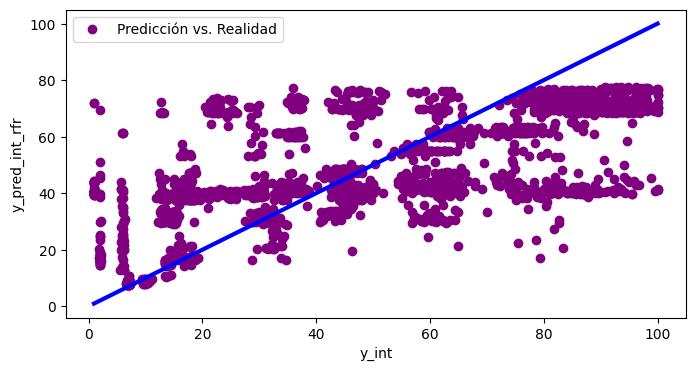

In [118]:
# Visualiza la predicción vs. los datos reales
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x=y_int, y=y_pred_int_rfr, color='purple', label='Predicción vs. Realidad')
ax.plot([min(y_int), max(y_int)], [min(y_int), max(y_int)], color='blue', linewidth=3)

ax.set_xlabel('y_int')
ax.set_ylabel('y_pred_int_rfr')

ax.legend()

In [119]:
print('Random Forest:')
print(f'MAE:  {mean_absolute_error(y_int, y_pred_int_rfr):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_int, y_pred_int_rfr)):.2f}')

Random Forest:
MAE:  16.84
RMSE: 21.55


# Conclusiones:

No hemos conseguido encontrar ni un solo algoritmo satisfactorio para tamaño ni inteligencia, por lo que sus variables continuas quedan descartadas, y pasamos a intentar predecirlos por clasificación de sus variables categóricas.

Por otra parte en el caso de longevidad hemos encontrado unos cuantos modelos aceptables, a continuación se listarán sus RMSE (raíz del error cuadrático medio) que es la métrica en la que nos vamos a basar para elegir el mejor modelo:

In [120]:
print('Métricas para los modelos de Longevidad\n')

print('Lineal:')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_lon, Y_PRED_lon)):.2f}\n')

print('Polinomio grado 2:')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_lon, y_pred_d2_lon)):.2f}\n')

print('Polinomio grado 3:')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_lon, y_pred_d3_lon)):.2f}\n')

print('Decission Tree:')
print(f'RMSE: {np.sqrt(mean_squared_error(y_lon, y_dt_pred_lon)):.2f}\n')

print('Lasso:')
print(f'RMSE: {np.sqrt(mean_squared_error(y_lon, y_pred_lon_lasso)):.2f}\n')

print('SVR:')
print(f'RMSE: {np.sqrt(mean_squared_error(y_lon, y_pred_lon_svr)):.2f}\n')

print('Random Forest:')
print(f'RMSE: {np.sqrt(mean_squared_error(y_lon, y_pred_lon_rf)):.2f}\n')

Métricas para los modelos de Longevidad

Lineal:
RMSE: 1.42

Polinomio grado 2:
RMSE: 1.38

Polinomio grado 3:
RMSE: 1.37

Decission Tree:
RMSE: 1.28

Lasso:
RMSE: 1.39

SVR:
RMSE: 1.39

Random Forest:
RMSE: 1.21



# Guardado de modelos:

In [121]:
pickle.dump(final_svr_model2, open("Models/modelo_svr_lon_final.pkl", "wb"))
